In [1]:
import pandas as pd

errorlogs_30100 = pd.read_pickle('errlogs.pkl') # from 30K to 100K
errorlogs_100end = pd.read_csv('errlogs-100000-end.csv') # from 100K to end 
errorlogs = pd.concat([errorlogs_30100, errorlogs_100end])
del errorlogs_30100
del errorlogs_100end
# found thanks to clustering! 
suspicious_cids = [70715, 70716, 74459, 74460, 74461, 74463, 74464]
suspicious_cids.append(88301) # very interesting case (as a data analyst: removing an outlier can dramatically ease your job!)
for cid in suspicious_cids:
    errorlogs = errorlogs[errorlogs.cid != cid]


In [2]:
# errorlogs = pd.read_csv('errlogs-25000-30000.csv') # from 100K to end 

In [3]:
len(errorlogs)

3644

In [4]:
errorlogs.loc[3]['error_message']

3    make[4]: flex: Command not found\nmake[4]: ***...
3    drivers/gpu/drm/amd/amdgpu/amdgpu_object.c: In...
Name: error_message, dtype: object

In [5]:
from enum import Enum, auto
class ErrorLog(Enum):
    BLACKLIGHT = auto(),
    BLACKLIGHT2 = auto(),
    CONFIG_NLS_DEFAULT = auto(),
    CRC32_CLUSTER = auto(),
    V4L2 = auto(), 
    OVERFLOW2 = auto(), 
    ULPI = auto(), 
    PCM = auto(),
    TTM = auto(), 
    AS68K = auto(), 
    GEN = auto(), 
    AICDB = auto(), 
    AIC7XXX = auto(),
    DRM_BRIDGE_CLUSTER = auto(),
    PINCTRL_CLUSTER = auto(), 
    BTBCM = auto(),
    BPFFANCY = auto(), 
    DEVM = auto(), 
    DEVM2 = auto(), 
    I2C_CLUSTER = auto() 
    


    

patterns = { ErrorLog.BLACKLIGHT : "undefined reference to `backlight_device",
            ErrorLog.BLACKLIGHT2: 'error: ‘intel_backlight_device_register’', # 'intel_backlight_device_register', # cid 87044 does not match BACKLIGHT 
            ErrorLog.CONFIG_NLS_DEFAULT : "CONFIG_NLS_DEFAULT",
            ErrorLog.CRC32_CLUSTER : 'undefined reference to `crc32', 
            ErrorLog.V4L2 : 'undefined reference to `v4l2',
            ErrorLog.OVERFLOW2 : '__read_overflow2',
            ErrorLog.ULPI : 'undefined reference to `ulpi', # 100-126K dataset
            ErrorLog.PCM : 'undefined reference to `atmel_pcm_dma_platform', # 100-126K dataset
            ErrorLog.TTM : 'undefined reference to `ttm', 
            ErrorLog.AS68K: 'as68k: not found',
            ErrorLog.GEN : 'undefined reference to `gen_pool', 
            ErrorLog.AIC7XXX: '[drivers/scsi/aic7xxx/aicasm/aicasm] Error 2', #'drivers/scsi/aic7xxx',
            ErrorLog.AICDB : 'aicdb.h: No such file or directory', 
            ErrorLog.DRM_BRIDGE_CLUSTER : 'undefined reference to `drm_panel_bridge_add', 
            ErrorLog.PINCTRL_CLUSTER : '[drivers/pinctrl/pinctrl-mcp23s08.o] Error', #'pinctrl-mcp23s08', # loosely pattern (too general?)
            ErrorLog.BTBCM : 'undefined reference to `btbcm_set_bdaddr', 
            ErrorLog.BPFFANCY : 'bpf-fancy', # loosely pattern (too general?)
            ErrorLog.DEVM : 'undefined reference to `__devm_regmap',
            ErrorLog.I2C_CLUSTER: 'error: implicit declaration of function ‘i2c_get_adapter’', #'i2c_get_adapter',
            ErrorLog.DEVM2 : 'undefined reference to `devm_of_led'
           }

pattern_name = [name for name, member in ErrorLog.__members__.items()]
# TODO: instead of having True/False values for each pattern column name, 
# let's have a single column with cluster(s) values
error_pattern = pd.DataFrame(columns=pattern_name, index=errorlogs['cid'])
error_pattern.fillna(False, inplace=True)

for i, errorlog in errorlogs.iterrows():
    error = errorlog['error_message']
    cid = errorlog['cid']
    for k, p in patterns.items():
        if (p in error):
            error_pattern.loc[cid][k.name] = True
            # TODO: error_pattern.loc[cid]['cluster_error'] = k.name
            #print (k.name, "found in configuration", cid)
            
            
            


In [6]:
# same, except we use the first error message (and only it)
# it mimics basic Linux build process
# see discussion here: https://github.com/TuxML/compilation-analysis/issues/1#issuecomment-488711237

pattern_name = [name for name, member in ErrorLog.__members__.items()]
error_patternfirst = pd.DataFrame(columns=pattern_name, index=errorlogs['cid'])
error_patternfirst.fillna(False, inplace=True)

for i, errorlog in errorlogs.iterrows():
    error = errorlog['error_message']
    cid = errorlog['cid']
    #print(cid)
    for err in error.splitlines():
        found = False
        for k, p in patterns.items():
            if found:
                break
            if (p in err):
                error_patternfirst.loc[cid][k.name] = True
                found = True
                #print (k, "found")
        if found:
            break
    #for k, p in patterns.items():
    #    if (p in error):
    #        error_patternfirst.loc[cid][k.name] = True
            #print (k.name, "found in configuration", cid)

In [7]:
error_patternfirst

,BLACKLIGHT,BLACKLIGHT2,CONFIG_NLS_DEFAULT,CRC32_CLUSTER,V4L2,OVERFLOW2,ULPI,PCM,TTM,AS68K,GEN,AICDB,AIC7XXX,DRM_BRIDGE_CLUSTER,PINCTRL_CLUSTER,BTBCM,BPFFANCY,DEVM,DEVM2,I2C_CLUSTER
cid,,,,,,,,,,,,,,,,,,,,
30699,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
30700,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
30704,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
30717,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
30718,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
30722,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
30726,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
30730,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
30731,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False


In [8]:
#error_pattern.loc[99949]['BLACKLIGHT'] = True
error_pattern['CONFIG_NLS_DEFAULT'].value_counts()
#error_pattern.hist()

False    3638
True        6
Name: CONFIG_NLS_DEFAULT, dtype: int64

BLACKLIGHT              15
BLACKLIGHT2              1
CONFIG_NLS_DEFAULT       6
CRC32_CLUSTER            2
V4L2                    19
OVERFLOW2               86
ULPI                     1
PCM                      1
TTM                     13
AS68K                  551
GEN                    371
AICDB                 2514
AIC7XXX               2681
DRM_BRIDGE_CLUSTER       3
PINCTRL_CLUSTER          3
BTBCM                    2
BPFFANCY                 2
DEVM                     2
DEVM2                    1
I2C_CLUSTER              1
dtype: int64

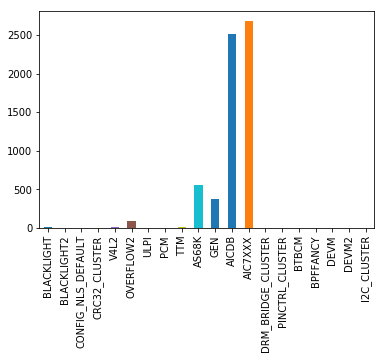

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline  

def nb_patterns(row):
    return sum(row == True)                    
error_pattern['nb_patterns'] = error_pattern.apply(nb_patterns, axis=1)
pattern_frequencies = error_pattern[pattern_name].apply(nb_patterns, axis=0)
pattern_frequencies.plot(kind='bar')
pattern_frequencies

BLACKLIGHT              15
BLACKLIGHT2              1
CONFIG_NLS_DEFAULT       6
CRC32_CLUSTER            2
V4L2                    19
OVERFLOW2               86
ULPI                     1
PCM                      1
TTM                     13
AS68K                  479
GEN                    369
AICDB                 2476
AIC7XXX                162
DRM_BRIDGE_CLUSTER       3
PINCTRL_CLUSTER          3
BTBCM                    2
BPFFANCY                 2
DEVM                     2
DEVM2                    1
I2C_CLUSTER              1
dtype: int64

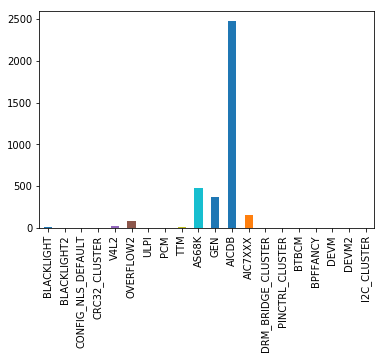

In [10]:
import numpy as np 
# error_patternfirst['nb_patterns'] = error_patternfirst.apply(nb_patterns, axis=1)
patternfirst_frequencies = error_patternfirst[pattern_name].apply(nb_patterns, axis=0)
patternfirst_frequencies.plot(kind='bar')
patternfirst_frequencies
# np.unique(error_patternfirst['nb_patterns'].values)

In [249]:


# 'cluster', 

#patternfirst_frequencies


In [244]:
np.sum(dfclusterfrequencies['nb_failures'])

3644

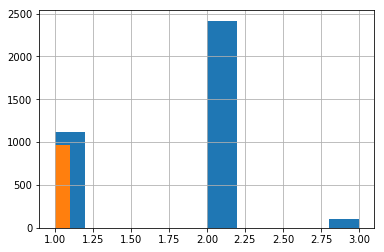

In [12]:
error_pattern['nb_patterns'].hist()
error_pattern.query("AIC7XXX == False")['nb_patterns'].hist()

In [13]:
error_pattern.sort_values(by='nb_patterns', ascending=False)[:20]

,BLACKLIGHT,BLACKLIGHT2,CONFIG_NLS_DEFAULT,CRC32_CLUSTER,V4L2,OVERFLOW2,ULPI,PCM,TTM,AS68K,...,AICDB,AIC7XXX,DRM_BRIDGE_CLUSTER,PINCTRL_CLUSTER,BTBCM,BPFFANCY,DEVM,DEVM2,I2C_CLUSTER,nb_patterns
cid,,,,,,,,,,,,,,,,,,,,,
83619,False,False,False,False,False,False,False,False,False,True,...,True,True,False,False,False,False,False,False,False,3
51532,False,False,False,False,False,False,False,False,False,True,...,True,True,False,False,False,False,False,False,False,3
73258,False,False,False,False,False,False,False,False,False,True,...,True,True,False,False,False,False,False,False,False,3
40041,False,False,False,False,False,False,False,False,False,True,...,True,True,False,False,False,False,False,False,False,3
45350,False,False,False,False,False,False,False,False,False,True,...,True,True,False,False,False,False,False,False,False,3
86309,False,False,False,False,False,False,False,False,False,True,...,True,True,False,False,False,False,False,False,False,3
77193,False,False,False,False,False,False,False,False,False,True,...,True,True,False,False,False,False,False,False,False,3
39669,False,False,False,False,False,False,False,False,False,True,...,True,True,False,False,False,False,False,False,False,3
84325,False,False,False,False,False,False,False,False,False,True,...,True,True,False,False,False,False,False,False,False,3


In [14]:
#error_pattern['CONFIG_NLS_DEFAULT'].value_counts().plot(kind='bar')
error_pattern.query('nb_patterns == 0')

,BLACKLIGHT,BLACKLIGHT2,CONFIG_NLS_DEFAULT,CRC32_CLUSTER,V4L2,OVERFLOW2,ULPI,PCM,TTM,AS68K,...,AICDB,AIC7XXX,DRM_BRIDGE_CLUSTER,PINCTRL_CLUSTER,BTBCM,BPFFANCY,DEVM,DEVM2,I2C_CLUSTER,nb_patterns
cid,,,,,,,,,,,,,,,,,,,,,


In [15]:
error_pattern.query('nb_patterns == 0').shape

(0, 21)

In [16]:
for cid in error_pattern.query('nb_patterns == 0').index:
    print ("configuration cid", cid)
    #if cid in suspicious_cids:
    #    print("false positive failure")
    #    continue
    
    error_message = errorlogs.query("cid == " + str(cid))['error_message'].values
    for err in error_message[0].splitlines():
        if "Cyclomatic" not in err:
            print (err)
    print()
    print()
    print()
    
# 74459, 74460, 74461, 74463, 74464

In [17]:
error_pattern.query('nb_patterns >= 2 & (AS68K == True & AIC7XXX == False)').sort_values(by='nb_patterns', ascending=False)



,BLACKLIGHT,BLACKLIGHT2,CONFIG_NLS_DEFAULT,CRC32_CLUSTER,V4L2,OVERFLOW2,ULPI,PCM,TTM,AS68K,...,AICDB,AIC7XXX,DRM_BRIDGE_CLUSTER,PINCTRL_CLUSTER,BTBCM,BPFFANCY,DEVM,DEVM2,I2C_CLUSTER,nb_patterns
cid,,,,,,,,,,,,,,,,,,,,,


In [18]:
error_pattern.query('nb_patterns >= 2 & (AS68K == False & AIC7XXX == False & AICDB == True)').sort_values(by='nb_patterns', ascending=False)


,BLACKLIGHT,BLACKLIGHT2,CONFIG_NLS_DEFAULT,CRC32_CLUSTER,V4L2,OVERFLOW2,ULPI,PCM,TTM,AS68K,...,AICDB,AIC7XXX,DRM_BRIDGE_CLUSTER,PINCTRL_CLUSTER,BTBCM,BPFFANCY,DEVM,DEVM2,I2C_CLUSTER,nb_patterns
cid,,,,,,,,,,,,,,,,,,,,,


In [19]:
#error_pattern.query('nb_patterns == 2 & (as68k == False & AIC7XXX == True)').sort_values(by='nb_patterns', ascending=False)
error_pattern.query('nb_patterns >= 2 & (AS68K == False & AICDB == False & AIC7XXX == True)').sort_values(by='nb_patterns', ascending=False)


,BLACKLIGHT,BLACKLIGHT2,CONFIG_NLS_DEFAULT,CRC32_CLUSTER,V4L2,OVERFLOW2,ULPI,PCM,TTM,AS68K,...,AICDB,AIC7XXX,DRM_BRIDGE_CLUSTER,PINCTRL_CLUSTER,BTBCM,BPFFANCY,DEVM,DEVM2,I2C_CLUSTER,nb_patterns
cid,,,,,,,,,,,,,,,,,,,,,


In [20]:
error_pattern.query('nb_patterns >= 2 & (AS68K == False & AIC7XXX == False)').sort_values(by='nb_patterns', ascending=False)


,BLACKLIGHT,BLACKLIGHT2,CONFIG_NLS_DEFAULT,CRC32_CLUSTER,V4L2,OVERFLOW2,ULPI,PCM,TTM,AS68K,...,AICDB,AIC7XXX,DRM_BRIDGE_CLUSTER,PINCTRL_CLUSTER,BTBCM,BPFFANCY,DEVM,DEVM2,I2C_CLUSTER,nb_patterns
cid,,,,,,,,,,,,,,,,,,,,,
60939,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,2
78770,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,2


In [21]:
# masking effect
error_pattern.query('nb_patterns >= 2 & CONFIG_NLS_DEFAULT == True').sort_values(by='nb_patterns', ascending=False)
error_pattern.query('CONFIG_NLS_DEFAULT == True').sort_values(by='nb_patterns', ascending=False)


,BLACKLIGHT,BLACKLIGHT2,CONFIG_NLS_DEFAULT,CRC32_CLUSTER,V4L2,OVERFLOW2,ULPI,PCM,TTM,AS68K,...,AICDB,AIC7XXX,DRM_BRIDGE_CLUSTER,PINCTRL_CLUSTER,BTBCM,BPFFANCY,DEVM,DEVM2,I2C_CLUSTER,nb_patterns
cid,,,,,,,,,,,,,,,,,,,,,
44596,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,1
52277,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,1
60391,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,1
62743,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,1
99949,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,1
121405,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,1


In [22]:
# masking effect
error_pattern.query('GEN == True').sort_values(by='nb_patterns', ascending=False)

,BLACKLIGHT,BLACKLIGHT2,CONFIG_NLS_DEFAULT,CRC32_CLUSTER,V4L2,OVERFLOW2,ULPI,PCM,TTM,AS68K,...,AICDB,AIC7XXX,DRM_BRIDGE_CLUSTER,PINCTRL_CLUSTER,BTBCM,BPFFANCY,DEVM,DEVM2,I2C_CLUSTER,nb_patterns
cid,,,,,,,,,,,,,,,,,,,,,
60939,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,2
78770,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,2
91189,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,1
93969,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,1
93724,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,1
93416,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,1
93271,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,1
92838,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,1
92120,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,1


In [23]:
error_pattern.query('BLACKLIGHT == True').sort_values(by='nb_patterns', ascending=False)

,BLACKLIGHT,BLACKLIGHT2,CONFIG_NLS_DEFAULT,CRC32_CLUSTER,V4L2,OVERFLOW2,ULPI,PCM,TTM,AS68K,...,AICDB,AIC7XXX,DRM_BRIDGE_CLUSTER,PINCTRL_CLUSTER,BTBCM,BPFFANCY,DEVM,DEVM2,I2C_CLUSTER,nb_patterns
cid,,,,,,,,,,,,,,,,,,,,,
59503,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,1
64086,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,1
65670,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,1
66938,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,1
67750,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,1
75145,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,1
81720,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,1
89618,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,1
93674,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,1


In [24]:
# nice masking effect!
error_pattern.query('PINCTRL_CLUSTER == True & (AS68K == False & AIC7XXX == False)').sort_values(by='nb_patterns', ascending=False)

,BLACKLIGHT,BLACKLIGHT2,CONFIG_NLS_DEFAULT,CRC32_CLUSTER,V4L2,OVERFLOW2,ULPI,PCM,TTM,AS68K,...,AICDB,AIC7XXX,DRM_BRIDGE_CLUSTER,PINCTRL_CLUSTER,BTBCM,BPFFANCY,DEVM,DEVM2,I2C_CLUSTER,nb_patterns
cid,,,,,,,,,,,,,,,,,,,,,
37227,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,1
89854,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,1
98605,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,1


In [25]:
# nice masking effect!
error_pattern.query('I2C_CLUSTER == True & (PINCTRL_CLUSTER == False & AS68K == False & AIC7XXX == False)').sort_values(by='nb_patterns', ascending=False)

,BLACKLIGHT,BLACKLIGHT2,CONFIG_NLS_DEFAULT,CRC32_CLUSTER,V4L2,OVERFLOW2,ULPI,PCM,TTM,AS68K,...,AICDB,AIC7XXX,DRM_BRIDGE_CLUSTER,PINCTRL_CLUSTER,BTBCM,BPFFANCY,DEVM,DEVM2,I2C_CLUSTER,nb_patterns
cid,,,,,,,,,,,,,,,,,,,,,
96730,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,1


In [26]:
import json
# see Hugo notebook here!
with open("option_columns.json","r") as f:
    option_columns = json.load(f)


In [27]:
import pandas as pd 
rawtuxdata = pd.read_csv("dataset_encoded.csv", dtype={k:"int8" for k in option_columns})
# rawtuxdata = pd.read_csv("dataset_after_encoding.csv", dtype={k:"int8" for k in option_columns})
rawtuxdata.query("cid >= 30000", inplace=True)
rawtuxdata.info(memory_usage='deep')
rawtuxdata.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96096 entries, 14758 to 110853
Columns: 12638 entries, 104_QUAD_8 to compile_success
dtypes: float64(3), int64(24), int8(12611)
memory usage: 1.1 GB


(96096, 12638)

In [28]:
for cid in suspicious_cids:
    rawtuxdata.query("cid != " + str(cid), inplace=True)
    # rawtuxdata = rawtuxdata[rawtuxdata.cid != cid]

In [29]:
rawtuxdata[['cid', 'X86_64', 'TRACING', 'FSI', 'DRM_VBOXVIDEO', 'GENERIC_ALLOCATOR', 'compile_success']][:10]

,cid,X86_64,TRACING,FSI,DRM_VBOXVIDEO,GENERIC_ALLOCATOR,compile_success
14758,30000,0,1,2,1,1,1
14759,30001,0,0,1,1,1,1
14760,30002,0,1,2,1,0,1
14761,30003,0,0,2,1,1,1
14762,30004,0,0,2,1,1,1
14763,30005,0,0,2,1,1,1
14764,30006,0,1,2,1,1,1
14765,30007,0,0,1,1,1,1
14766,30008,0,1,2,1,1,1
14767,30009,0,0,2,1,1,1


In [30]:
len(rawtuxdata.query("compile_success != 1").index)

3621

In [31]:
set(errorlogs['cid']) - set(rawtuxdata['cid']) # duplicates!

{33833,
 33836,
 33837,
 54125,
 54126,
 54127,
 54128,
 54129,
 56432,
 56558,
 57249,
 70614,
 70665,
 70709,
 70710,
 74227,
 74233,
 78892,
 79033,
 79141,
 88152,
 88817,
 88909}

In [32]:
set(rawtuxdata['cid']) - set(errorlogs['cid'])

{30000,
 30001,
 30002,
 30003,
 30004,
 30005,
 30006,
 30007,
 30008,
 30009,
 30010,
 30011,
 30012,
 30013,
 30014,
 30015,
 30016,
 30017,
 30018,
 30019,
 30020,
 30021,
 30022,
 30023,
 30024,
 30025,
 30026,
 30027,
 30028,
 30029,
 30030,
 30031,
 30032,
 30033,
 30034,
 30035,
 30036,
 30037,
 30038,
 30039,
 30040,
 30041,
 30042,
 30043,
 30044,
 30045,
 30046,
 30047,
 30048,
 30049,
 30050,
 30051,
 30052,
 30053,
 30054,
 30055,
 30056,
 30057,
 30058,
 30059,
 30060,
 30061,
 30062,
 30063,
 30064,
 30065,
 30066,
 30067,
 30068,
 30069,
 30070,
 30071,
 30072,
 30073,
 30074,
 30075,
 30076,
 30077,
 30078,
 30079,
 30080,
 30081,
 30082,
 30083,
 30084,
 30085,
 30086,
 30087,
 30088,
 30089,
 30090,
 30091,
 30092,
 30093,
 30094,
 30095,
 30096,
 30097,
 30098,
 30099,
 30100,
 30101,
 30102,
 30103,
 30104,
 30105,
 30106,
 30107,
 30108,
 30109,
 30110,
 30111,
 30112,
 30113,
 30114,
 30115,
 30116,
 30117,
 30118,
 30119,
 30120,
 30121,
 30122,
 30123,
 30124,


In [33]:
basic_head = ["cid", "time", "date"] # "compile"
compilation_status_column_name = 'compile_success'
size_methods = ["vmlinux", "GZIP-bzImage", "GZIP-vmlinux", "GZIP", "BZIP2-bzImage", 
              "BZIP2-vmlinux", "BZIP2", "LZMA-bzImage", "LZMA-vmlinux", "LZMA", "XZ-bzImage", "XZ-vmlinux", "XZ", 
              "LZO-bzImage", "LZO-vmlinux", "LZO", "LZ4-bzImage", "LZ4-vmlinux", "LZ4"]

In [34]:
print(str(len(rawtuxdata)) + " before the removal of some entries (those with same configurations)")
# tuxdata.drop_duplicates(subset=tuxdata.columns.difference(['vmlinux']), inplace=True)
# rawtuxdata.drop_duplicates(subset=rawtuxdata.columns.difference(size_methods).difference(basic_head), inplace=True)
rawtuxdata.drop_duplicates(subset=rawtuxdata.columns.difference(basic_head).difference([compilation_status_column_name]), inplace=True)
print(str(len(rawtuxdata)) + " after the removal of some entries (those with same configurations)")

96094 before the removal of some entries (those with same configurations)
96094 after the removal of some entries (those with same configurations)


In [35]:
#rawtuxdata.columns

In [36]:
rawtuxdata[:10][['cid']]
# rawtuxdata.query("cid >= 30000", inplace=True)

,cid
14758,30000
14759,30001
14760,30002
14761,30003
14762,30004
14763,30005
14764,30006
14765,30007
14766,30008
14767,30009


In [37]:
import pandas as pd
from tabulate import tabulate

def pandas_df_to_markdown_table(df):
    # Dependent upon ipython
    # shamelessly stolen from https://stackoverflow.com/questions/33181846/programmatically-convert-pandas-dataframe-to-markdown-table
    from IPython.display import Markdown, display
    fmt = ['---' for i in range(len(df.columns))]
    df_fmt = pd.DataFrame([fmt], columns=df.columns)
    df_formatted = pd.concat([df_fmt, df])
    #display(Markdown(df_formatted.to_csv(sep="|", index=False)))
    return Markdown(df_formatted.to_csv(sep="|", index=False))
#     return df_formatted

def df_to_markdown(df, y_index=False):
    blob = tabulate(df, headers='keys', tablefmt='pipe')
    if not y_index:
        # Remove the index with some creative splicing and iteration
        return '\n'.join(['| {}'.format(row.split('|', 2)[-1]) for row in blob.split('\n')])
    return blob


generic_mask = rawtuxdata.query("cid >= 30000 & GENERIC_ALLOCATOR == 0 & DRM_VBOXVIDEO == 2 & (AIC7XXX_BUILD_FIRMWARE == 1 | AIC79XX_BUILD_FIRMWARE == 1)")[['cid', compilation_status_column_name, 'AIC7XXX_BUILD_FIRMWARE', 'AIC79XX_BUILD_FIRMWARE', 'GENERIC_ALLOCATOR', 'DRM_VBOXVIDEO']]
#print(df_to_markdown(generic_mask))

for cid in generic_mask['cid'].values:
    print(error_patternfirst.query("cid == " + str(cid))[['AICDB', 'AS68K', 'AIC7XXX']])

       AICDB  AS68K  AIC7XXX
cid                         
30901  False  False     True
       AICDB  AS68K  AIC7XXX
cid                         
37341   True  False    False
       AICDB  AS68K  AIC7XXX
cid                         
40757   True  False    False
       AICDB  AS68K  AIC7XXX
cid                         
48193   True  False    False
       AICDB  AS68K  AIC7XXX
cid                         
50359   True  False    False
       AICDB  AS68K  AIC7XXX
cid                         
55986   True  False    False
       AICDB  AS68K  AIC7XXX
cid                         
59253   True  False    False
       AICDB  AS68K  AIC7XXX
cid                         
61758   True  False    False
       AICDB  AS68K  AIC7XXX
cid                         
67576   True  False    False
       AICDB  AS68K  AIC7XXX
cid                         
79099   True  False    False
       AICDB  AS68K  AIC7XXX
cid                         
84168   True  False    False


In [38]:
errorlogs.query("cid == 40757")['error_message'].values

array(['drivers/gpu/drm/radeon/radeon_object.c: In function \'radeon_bo_create\':\ndrivers/gpu/drm/radeon/radeon_object.c:242:2: warning: #warning Please enable CONFIG_MTRR and CONFIG_X86_PAT for better performance thanks to write-combining [-Wcpp]\n #warning Please enable CONFIG_MTRR and CONFIG_X86_PAT for better performance \\\n  ^~~~~~~\ndrivers/gpu/drm/radeon/radeon_object.c:242:2: warning: #warning Please enable CONFIG_MTRR and CONFIG_X86_PAT for better performance thanks to write-combining [-Wcpp]\n #warning Please enable CONFIG_MTRR and CONFIG_X86_PAT for better performance \\\n  ^~~~~~~\naicasm_symbol.c:48:19: fatal error: aicdb.h: No such file or directory\n #include "aicdb.h"\n                   ^\ncompilation terminated.\naicasm_gram.tab.c: In function \'yyparse\':\naicasm_gram.tab.c:1628:16: warning: implicit declaration of function \'yylex\' [-Wimplicit-function-declaration]\naicasm_macro_gram.tab.c: In function \'mmparse\':\n/TuxML/linux-4.13.3/drivers/scsi/aic7xxx/aicasm

In [39]:
cid_errors_not_in_configdata = set(errorlogs['cid']) - set(rawtuxdata['cid'])
for cid in cid_errors_not_in_configdata:
    error_message = errorlogs.query("cid == " + str(cid))['error_message'].values
    for err in error_message[0].splitlines():
        if "Cyclomatic" not in err:
            print (err)
    

aicasm_symbol.c:48:19: fatal error: aicdb.h: No such file or directory
 #include "aicdb.h"
                   ^
compilation terminated.
aicasm_gram.tab.c: In function 'yyparse':
aicasm_gram.tab.c:1628:16: warning: implicit declaration of function 'yylex' [-Wimplicit-function-declaration]
aicasm_macro_gram.tab.c: In function 'mmparse':
/TuxML/linux-4.13.3/drivers/scsi/aic7xxx/aicasm//aicasm_macro_gram.c:64:25: warning: implicit declaration of function 'mmlex' [-Wimplicit-function-declaration]
 #define yylex           mmlex
                         ^
aicasm_macro_gram.tab.c:1199:16: note: in expansion of macro 'yylex'
aicasm_scan.l: In function 'yylex':
aicasm_scan.l:420:6: warning: implicit declaration of function 'mm_switch_to_buffer' [-Wimplicit-function-declaration]
      yy_switch_to_buffer(temp_state);
      ^~~~~~~~~~~~~~~~~~~
aicasm_scan.l:421:6: warning: implicit declaration of function 'mmparse' [-Wimplicit-function-declaration]
      mm_switch_to_buffer(old_state);
      ^~~~~

In file included from ./include/linux/bitmap.h:8:0,
                 from ./include/linux/cpumask.h:11,
                 from ./arch/x86/include/asm/cpumask.h:4,
                 from ./arch/x86/include/asm/msr.h:10,
                 from ./arch/x86/include/asm/processor.h:20,
                 from ./arch/x86/include/asm/cpufeature.h:4,
                 from ./arch/x86/include/asm/thread_info.h:52,
                 from ./include/linux/thread_info.h:37,
                 from ./arch/x86/include/asm/preempt.h:6,
                 from ./include/linux/preempt.h:80,
                 from ./include/linux/spinlock.h:50,
                 from drivers/infiniband/core/core_priv.h:37,
                 from drivers/infiniband/core/roce_gid_mgmt.c:33:
In function 'memcpy',
    inlined from 'rdma_ip2gid' at ./include/rdma/ib_addr.h:175:3,
    inlined from 'addr_event.isra.0.constprop' at drivers/infiniband/core/roce_gid_mgmt.c:691:2,
    inlined from 'inetaddr_event' at drivers/infiniband/core/roce_

In [40]:
# TODO: workaround 
# see issue here: https://github.com/TuxML/compilation-analysis/issues/7
for cid in cid_errors_not_in_configdata:
    errorlogs = errorlogs[errorlogs.cid != cid]
    error_patternfirst = error_patternfirst[error_patternfirst.index != cid]
    error_pattern = error_pattern[error_pattern.index != cid]

errorlogs.shape, error_patternfirst.shape, error_pattern.shape

((3621, 2), (3621, 20), (3621, 21))

BLACKLIGHT              15
BLACKLIGHT2              1
CONFIG_NLS_DEFAULT       6
CRC32_CLUSTER            2
V4L2                    19
OVERFLOW2               83
ULPI                     1
PCM                      1
TTM                     13
AS68K                  476
GEN                    367
AICDB                 2464
AIC7XXX                161
DRM_BRIDGE_CLUSTER       3
PINCTRL_CLUSTER          3
BTBCM                    2
BPFFANCY                 0
DEVM                     2
DEVM2                    1
I2C_CLUSTER              1
dtype: int64

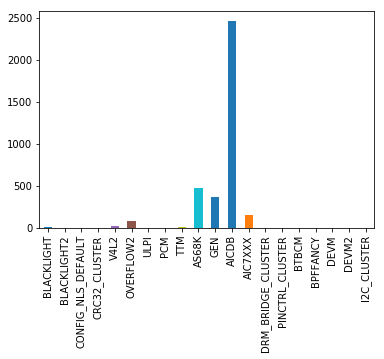

In [41]:
patternfirst_frequencies = error_patternfirst[pattern_name].apply(nb_patterns, axis=0)
patternfirst_frequencies.plot(kind='bar')
patternfirst_frequencies

In [245]:
np.sum(patternfirst_frequencies)

3621

In [246]:
import pandas as pd

dfcluster = pd.DataFrame(columns=["cluster", "error message"])
i = 0
for p in patterns:
    dfcluster.loc[i] = p.name, patterns[p]
    i = i + 1
    
# dfcluster
#
dfpatternfirst_frequencies = pd.DataFrame(columns=['nb_failures'], data=patternfirst_frequencies).rename_axis('cluster').reset_index()
dfclusterfrequencies = pd.merge(dfcluster, dfpatternfirst_frequencies, on="cluster", how="outer")

total_occurences = np.sum(dfclusterfrequencies['nb_failures'])

dfclusterfrequencies['percentage'] = round((dfclusterfrequencies['nb_failures'] / total_occurences) * 100, 2)
dfclusterfrequencies.sort_values(by='nb_failures', ascending=False)
#dfpatternfirst_frequencies['cluster'] = dfpatternfirst_frequencies.index
#dfpatternfirst_frequencies.reset_index(inplace=True)


,cluster,error message,nb_failures,percentage
12,AICDB,aicdb.h: No such file or directory,2464,68.05
9,AS68K,as68k: not found,476,13.15
10,GEN,undefined reference to `gen_pool,367,10.14
11,AIC7XXX,[drivers/scsi/aic7xxx/aicasm/aicasm] Error 2,161,4.45
5,OVERFLOW2,__read_overflow2,83,2.29
4,V4L2,undefined reference to `v4l2,19,0.52
0,BLACKLIGHT,undefined reference to `backlight_device,15,0.41
8,TTM,undefined reference to `ttm,13,0.36
2,CONFIG_NLS_DEFAULT,CONFIG_NLS_DEFAULT,6,0.17
13,DRM_BRIDGE_CLUSTER,undefined reference to `drm_panel_bridge_add,3,0.08


In [247]:
np.sum(dfclusterfrequencies['nb_failures'])

3621

In [252]:
with open('clusters.tex', 'w') as f:
    f.write(dfclusterfrequencies.to_latex(index=False))

with open('clusters-AM.csv', 'w') as f:
    f.write(dfclusterfrequencies.to_csv())

In [248]:
dfclusterfrequencies.to_latex(index=False)

'\\begin{tabular}{llrr}\n\\toprule\n            cluster &                                      error message &  nb\\_failures &  percentage \\\\\n\\midrule\n         BLACKLIGHT &           undefined reference to `backlight\\_device &           15 &        0.41 \\\\\n        BLACKLIGHT2 &           error: ‘intel\\_backlight\\_device\\_register’ &            1 &        0.03 \\\\\n CONFIG\\_NLS\\_DEFAULT &                                 CONFIG\\_NLS\\_DEFAULT &            6 &        0.17 \\\\\n      CRC32\\_CLUSTER &                      undefined reference to `crc32 &            2 &        0.06 \\\\\n               V4L2 &                       undefined reference to `v4l2 &           19 &        0.52 \\\\\n          OVERFLOW2 &                                   \\_\\_read\\_overflow2 &           83 &        2.29 \\\\\n               ULPI &                       undefined reference to `ulpi &            1 &        0.03 \\\\\n                PCM &     undefined reference to `atmel\\_pcm\\

In [42]:
rawtuxdata.fillna(-1, inplace=True)

In [43]:
from sklearn.model_selection import train_test_split
from sklearn import tree


TESTING_SIZE= 0.001 #0.99 # 0.001 # 0.9
X_train, X_test, y_train, y_test = train_test_split(
    rawtuxdata
    .drop(columns=["cid"])
    # .drop(columns=size_methods)
    .drop(columns=compilation_status_column_name), 
    rawtuxdata[compilation_status_column_name], test_size=TESTING_SIZE, random_state=0)  
clf = tree.DecisionTreeClassifier() #GradientBoostingClassifier(n_estimators=100) #RandomForestRegressor(n_estimators=100) #   #GradientBoostingRegressor(n_estimators=100)  
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [44]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, balanced_accuracy_score

y_pred = clf.predict(X_test)

acc = accuracy_score (y_test, y_pred)
prec = precision_score (y_test, y_pred)
reca = recall_score (y_test, y_pred)
f1 = f1_score (y_test, y_pred)
balance_acc = balanced_accuracy_score (y_test, y_pred)
print("Accuracy score:", acc)
print("Precision score:", prec)
print("Recall score:", reca)
print("F1 score:", f1)
print("Balanced accuracy score:", balance_acc)

Accuracy score: 1.0
Precision score: 1.0
Recall score: 1.0
F1 score: 1.0
Balanced accuracy score: 1.0


In [45]:
del X_train
del X_test 
del y_train 
del y_test

In [46]:
import graphviz 

def printTree(clf, feature_names):
    dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=feature_names,  
                         filled=True, rounded=True,
                         special_characters=True)  
    graph = graphviz.Source(dot_data)  
    graph.render("TUXML_compilation_failures")
    
# printTree(clf, rawtuxdata.drop(columns=["cid"]).drop(columns=size_methods).drop(columns=compilation_status_column_name).columns)
printTree(clf, rawtuxdata.drop(columns=["cid"]).drop(columns=compilation_status_column_name).columns)

In [47]:
rawtuxdata.query("AIC79XX_BUILD_FIRMWARE == 1 & VIDEO_SAA7134_GO7007 == 2 & VFIO_PCI_INTX == 1")[[compilation_status_column_name, 'INITRAMFS_SOURCE']]

rawtuxdata.query("AIC79XX_BUILD_FIRMWARE == 1 & " + compilation_status_column_name + " == 1")[[compilation_status_column_name, 'INITRAMFS_SOURCE', 'cid']]

,compile_success,INITRAMFS_SOURCE,cid


In [48]:
from sklearn.tree import _tree

def tree_to_rules(tree, feature_names):
    tree_ = tree.tree_
    feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]
    #print ("def tree({}):".format(", ".join(feature_names)))

    def recurse(node, previous_rules):
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            #print ("{}if {} <= {}:".format(indent, name, threshold))
            recurse(tree_.children_left[node], previous_rules+[name + " <= " + str(threshold)])
            #print ("{}else:  # if {} > {}".format(indent, name, threshold))
            recurse(tree_.children_right[node], previous_rules+[name + " > " + str(threshold)])
        else:
            print(" & ".join(previous_rules) + " ---> " + str(tree_.value[node]))

    recurse(0, [])
    
#tree_to_rules(clf, rawtuxdata.drop(columns=["cid"]).drop(columns=size_methods).drop(columns=compilation_status_column_name).columns)
tree_to_rules(clf, rawtuxdata.drop(columns=["cid"]).drop(columns=compilation_status_column_name).columns)

AIC79XX_BUILD_FIRMWARE <= 0.5 & AIC7XXX_BUILD_FIRMWARE <= 0.5 & WANXL_BUILD_FIRMWARE <= 0.5 & GENERIC_ALLOCATOR <= 0.5 & DRM_VBOXVIDEO <= 1.5 & HFI1_VERBS_31BIT_PSN <= 0.5 & ISDN_DRV_AVMB1_T1PCI <= 0.5 & NFS_V2 <= 0.5 ---> [[1. 0.]]
AIC79XX_BUILD_FIRMWARE <= 0.5 & AIC7XXX_BUILD_FIRMWARE <= 0.5 & WANXL_BUILD_FIRMWARE <= 0.5 & GENERIC_ALLOCATOR <= 0.5 & DRM_VBOXVIDEO <= 1.5 & HFI1_VERBS_31BIT_PSN <= 0.5 & ISDN_DRV_AVMB1_T1PCI <= 0.5 & NFS_V2 > 0.5 ---> [[0. 7.]]
AIC79XX_BUILD_FIRMWARE <= 0.5 & AIC7XXX_BUILD_FIRMWARE <= 0.5 & WANXL_BUILD_FIRMWARE <= 0.5 & GENERIC_ALLOCATOR <= 0.5 & DRM_VBOXVIDEO <= 1.5 & HFI1_VERBS_31BIT_PSN <= 0.5 & ISDN_DRV_AVMB1_T1PCI > 0.5 & WIL6210_TRACING <= 0.5 & INFINIBAND_ISERT <= 1.5 & SPI_SH_MSIOF <= 0.5 & AD525X_DPOT_I2C <= 1.5 ---> [[ 0. 28.]]
AIC79XX_BUILD_FIRMWARE <= 0.5 & AIC7XXX_BUILD_FIRMWARE <= 0.5 & WANXL_BUILD_FIRMWARE <= 0.5 & GENERIC_ALLOCATOR <= 0.5 & DRM_VBOXVIDEO <= 1.5 & HFI1_VERBS_31BIT_PSN <= 0.5 & ISDN_DRV_AVMB1_T1PCI > 0.5 & WIL6210_TRACING 

In [49]:
def tree_to_failure_rules(tree, feature_names):
    tree_ = tree.tree_
    feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]
    #print ("def tree({}):".format(", ".join(feature_names)))

    def recurse(node, previous_rules, acc):
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            #print ("{}if {} <= {}:".format(indent, name, threshold))
            recurse(tree_.children_left[node], previous_rules+[name + " <= " + str(threshold)], acc)
            #print ("{}else:  # if {} > {}".format(indent, name, threshold))
            recurse(tree_.children_right[node], previous_rules+[name + " > " + str(threshold)], acc)
        else:
            if tree_.value[node][0][0] > tree_.value[node][0][1]:
                #print(" & ".join(previous_rules) + " ---> " + str(tree_.value[node]))
                acc.append(" & ".join(previous_rules))

    acc = []
    recurse(0, [], acc)
    return acc
    
# all_paths = tree_to_failure_rules(clf, rawtuxdata.drop(columns=["cid"]).drop(columns=size_methods).drop(columns=compilation_status_column_name).columns)
all_paths = tree_to_failure_rules(clf, rawtuxdata.drop(columns=["cid"]).drop(columns=compilation_status_column_name).columns)

In [50]:

    
def find_rule_for_configuration(tree, feature_names, configuration):
    tree_ = tree.tree_
    feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]
    
    def recurse(node, previous_rules, configuration):
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            #print ("{}if {} <= {}:".format(indent, name, threshold))
            if configuration[name] <= threshold:
                return recurse(tree_.children_left[node], previous_rules+[name + " <= " + str(threshold)], configuration)
            #print ("{}else:  # if {} > {}".format(indent, name, threshold))
            else:
                return recurse(tree_.children_right[node], previous_rules+[name + " > " + str(threshold)], configuration)
        else:
            #if tree_.value[node][0][0] > tree_.value[node][0][1]:
            #print(" & ".join(previous_rules))
            return " & ".join(previous_rules)
       
    return recurse(0, [], configuration)
    
def find_rule_for_configuration_id(cid):
    # return find_rule_for_configuration(clf, rawtuxdata.drop(columns=["cid"]).drop(columns=size_methods).drop(columns=compilation_status_column_name).columns, rawtuxdata.query("cid == " + str(cid)).iloc[0]) 
    return find_rule_for_configuration(clf, rawtuxdata.drop(columns=["cid"]).drop(columns=compilation_status_column_name).columns, rawtuxdata.query("cid == " + str(cid)).iloc[0]) 

find_rule_for_configuration_id(92072)

'AIC79XX_BUILD_FIRMWARE <= 0.5 & AIC7XXX_BUILD_FIRMWARE <= 0.5 & WANXL_BUILD_FIRMWARE <= 0.5 & GENERIC_ALLOCATOR > 0.5 & UBSAN_SANITIZE_ALL <= 0.5 & VIDEO_XILINX_VTC > 0.5 & CRC32 > 0.5 & VIDEO_S5P_MIPI_CSIS > 0.5 & VIDEO_RCAR_VIN > 0.5 & XEN_PCIDEV_FRONTEND > 0.5 & VME_CA91CX42 > 0.5 & NLS > 1.5 & USB_PULSE8_CEC > 0.5 & REGMAP_MMIO <= 0.5 & SND_SOC_GTM601 > 1.5'

In [51]:
rawtuxdata.query("AIC7XXX_BUILD_FIRMWARE == 1 | AIC79XX_BUILD_FIRMWARE == 1 | WANXL_BUILD_FIRMWARE == 1").shape

(3108, 12638)

In [52]:
rawtuxdata.query("(AIC7XXX_BUILD_FIRMWARE == 0 & AIC79XX_BUILD_FIRMWARE == 0) & WANXL_BUILD_FIRMWARE == 1")['compile_success'].unique()

array([0])

In [53]:
rawtuxdata.query("AIC7XXX_BUILD_FIRMWARE == 0 & AIC79XX_BUILD_FIRMWARE == 0 & WANXL_BUILD_FIRMWARE == 0 & compile_success == False").shape

(513, 12638)

In [54]:
'''
basic conclusion: bug GENERIC_ALLOCATOR + DRM_VBOXVIDEO is always masked by firmwares-like failures
'''
generic_allocator_mask_firmwares = rawtuxdata.query("GENERIC_ALLOCATOR == 0 & DRM_VBOXVIDEO == 2 & (AIC7XXX_BUILD_FIRMWARE == 1 | AIC79XX_BUILD_FIRMWARE == 1 | WANXL_BUILD_FIRMWARE == 1)  & compile_success == False")
print("generic allocator bug with firmwares' failures", generic_allocator_mask_firmwares.shape)
print()
print()
for cid in generic_allocator_mask_firmwares['cid']:
    print ("###### configuration id", cid)
    err_pattern = error_pattern.query("cid == " + str(cid)).iloc[0]
    for err in ErrorLog:
        if (err_pattern[err.name]):
            print(err)
    error_messages = errorlogs.query("cid == " + str(cid)).iloc[0]['error_message'].splitlines()
    for error in error_messages:
        if "Cyclomatic " not in error:
            print(error)
    print()
    print()




generic allocator bug with firmwares' failures (13, 12638)


###### configuration id 30901
ErrorLog.AIC7XXX
make[4]: flex: Command not found
make[4]: *** [/TuxML/linux-4.13.3/drivers/scsi/aic7xxx/aicasm//aicasm_scan.c] Error 127
make[3]: *** [drivers/scsi/aic7xxx/aicasm/aicasm] Error 2
make[2]: *** [drivers/scsi/aic7xxx] Error 2
make[1]: *** [drivers/scsi] Error 2
make[1]: *** Waiting for unfinished jobs....
make: *** [drivers] Error 2


###### configuration id 36364
ErrorLog.AS68K
In file included from ./include/linux/uaccess.h:13:0,
                 from ./include/linux/highmem.h:8,
                 from fs/binfmt_elf.c:28:
fs/binfmt_elf.c: In function 'create_elf_tables':
./arch/x86/include/asm/uaccess_64.h:143:20: warning: array subscript is above array bounds [-Warray-bounds]
    __put_user_asm(4[(u16 *)src], 4 + (u16 __user *)dst,
                    ^
./arch/x86/include/asm/uaccess.h:468:16: note: in definition of macro '__put_user_asm'
        : ltype(x), "m" (__m(addr)), "i" (

/bin/sh: 1: as68k: not found
make[3]: *** [drivers/net/wan/wanxlfw.inc] Error 127
make[3]: *** Waiting for unfinished jobs....
make[2]: *** [drivers/net/wan] Error 2
make[2]: *** Waiting for unfinished jobs....
make[1]: *** [drivers/net] Error 2
make: *** [drivers] Error 2


###### configuration id 55986
ErrorLog.AICDB
ErrorLog.AIC7XXX
aicasm_symbol.c:48:19: fatal error: aicdb.h: No such file or directory
 #include "aicdb.h"
                   ^
compilation terminated.
aicasm_gram.tab.c: In function 'yyparse':
aicasm_gram.tab.c:1628:16: warning: implicit declaration of function 'yylex' [-Wimplicit-function-declaration]
aicasm_macro_gram.tab.c: In function 'mmparse':
/TuxML/linux-4.13.3/drivers/scsi/aic7xxx/aicasm//aicasm_macro_gram.c:64:25: warning: implicit declaration of function 'mmlex' [-Wimplicit-function-declaration]
 #define yylex           mmlex
                         ^
aicasm_macro_gram.tab.c:1199:16: note: in expansion of macro 'yylex'
aicasm_scan.l: In function 'yylex':
ai

In [55]:
'''
basic conclusion: bug GENERIC_ALLOCATOR + DRM_VBOXVIDEO is not dominated by other bugs than firmware
'''

generic_allocator_mask_notfirmware = rawtuxdata.query("GENERIC_ALLOCATOR == 0 & DRM_VBOXVIDEO == 2 & ~(AIC7XXX_BUILD_FIRMWARE == 1 | AIC79XX_BUILD_FIRMWARE == 1 | WANXL_BUILD_FIRMWARE == 1)  & compile_success == 0")


print("generic allocator bug *without* firmwares' failures", generic_allocator_mask_notfirmware.shape)
print()
print()
for cid in generic_allocator_mask_notfirmware['cid']:
    err_pattern = error_pattern.query("cid == " + str(cid)).iloc[0]
    if not (err_pattern[ErrorLog.GEN.name]):
        print ("###### configuration id", cid)
        print("GENERIC allocator NOT found")
    #else:
    #    for err in ErrorLog:
    #        if (err_pattern[err.name]):
    #            print(err)
   

generic allocator bug *without* firmwares' failures (369, 12638)




In [56]:
# ~(AIC7XXX_BUILD_FIRMWARE == 1 | AIC79XX_BUILD_FIRMWARE == 1 | WANXL_BUILD_FIRMWARE == 1)  &
# Mathieu: I'm deactivating it, it's time-consuming and error-prone 
if False:
    for path1 in all_paths[::-1]:
        # collect all cids related to a path
        path_cids = rawtuxdata.query(path1 + " & compile_success == False")['cid'].values
        spath_cids = set(path_cids)
        print (path1)
        for path2 in all_paths[::-1]:
            if (path1 != path2):                
                for cid in path_cids:
                    # report whether an alternate path/rule can match the cid 
                    #print (cid)
                    overlap = rawtuxdata.query(path2 + " & compile_success == False & cid == " + str(cid)) #['cid'].values
                    #overlap = list(spath_cids & set(path_cids2)) 
                    if len(overlap) > 0:
                        print(path1, "also hold with\n", path2, "=> #", overlap)
                        print()
    
       
#    for path2 in all_paths:
#        if (path1 != path2):
#            overlap = len(rawtuxdata.query(path1 + " | ~(" + path2 + ") & compile_success == False").index)
#            if  overlap > 0:
#                print(path1, "also hold with\n", path2, "=> #", overlap)
#                print()
        
        
#

In [57]:
# TODO: classification on clusters!
rawtuxdata = pd.merge(rawtuxdata, error_patternfirst, on='cid', how='outer')

In [58]:
rawtuxdata.shape, error_patternfirst.shape

((96094, 12658), (3621, 20))

In [59]:
rawtuxdata.query(ErrorLog.AICDB.name + " == True").shape
# rawtuxdata['cid']
# configwithclusters['cid']

(2464, 12658)

In [60]:
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels


def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    else:
        #print('Confusion matrix, without normalization')
        pass

    #print(cm)

    fig, ax = plt.subplots(figsize=(15, 15))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

In [61]:
for err in ErrorLog:
    rawtuxdata[err.name] = rawtuxdata[err.name].fillna(False)

In [62]:
'''
create a column with the first kind/cluster of error message that pops out
it will be a label
allows multi-class classification (instead of simply binary classification)
TODO: applies to error_patternfirst and error_pattern
'''

from sklearn.preprocessing import LabelEncoder
# FIXE: enum auto() does not work
def which_pattern(row):
    for err in ErrorLog:
        if (row[err.name]):
            return err.name
    return "NO_FAILURE"
cluster_errorfirst = rawtuxdata.apply(which_pattern, axis=1)
cluster_errorfirst.unique()


array(['NO_FAILURE', 'AS68K', 'AIC7XXX', 'OVERFLOW2', 'GEN', 'V4L2',
       'DRM_BRIDGE_CLUSTER', 'AICDB', 'PINCTRL_CLUSTER',
       'CONFIG_NLS_DEFAULT', 'TTM', 'CRC32_CLUSTER', 'BTBCM',
       'BLACKLIGHT', 'DEVM2', 'DEVM', 'BLACKLIGHT2', 'I2C_CLUSTER', 'PCM',
       'ULPI'], dtype=object)

In [63]:

# encoding strings as labels
le_cluster = LabelEncoder()
rawtuxdata['cluster_errorfirst'] = le_cluster.fit_transform(cluster_errorfirst)

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import matthews_corrcoef
from sklearn import tree
from sklearn.metrics import classification_report
import graphviz 

'''
1. when cluster_of_interest == 'cluster_errorfirst' it is a multiclass classification (multi-class is all clusters' errors)
2. when cluster_of_interest is the name of a cluster, it is a per class classification 
(ie we aim to recognize a specific failure and the rest is either other failure or NO failure)
3. for simple failure/no failure, see elsewhere
4. (TODO) it is also possible to have a look at a subset of clusters (not all), but not generalized here (I've made some experiments though)
'''
def mk_decisiontree_overcluster(cluster_of_interest, print_cfmatrix=True):

    TESTING_SIZE_CLUSTER= 0.1 #0.99 # 0.001 # 0.9
    X_train_cluster, X_test_cluster, y_train_cluster, y_test_cluster = train_test_split(
        rawtuxdata
        .drop(columns=["cid"])
        .drop(columns=['cluster_errorfirst'])
       # .drop(columns=["nb_patterns"])
        .drop(columns=pattern_name)
       # .drop(columns=size_methods)
        .drop(columns=compilation_status_column_name), 
        rawtuxdata[cluster_of_interest], ### can be 'cluster_errorfirst' column ie all clusters are of interest!
        test_size=TESTING_SIZE_CLUSTER, random_state=0)  

    clf_cluster = tree.DecisionTreeClassifier() #GradientBoostingClassifier(n_estimators=100) #RandomForestRegressor(n_estimators=100) #   #GradientBoostingRegressor(n_estimators=100)  
    clf_cluster.fit(X_train_cluster, y_train_cluster)
        
    ######## eval_decisiontree
    y_pred_cluster = clf_cluster.predict(X_test_cluster)

    acc_cl = accuracy_score (y_test_cluster, y_pred_cluster)
    if (cluster_of_interest == 'cluster_errorfirst'):
        #### multi-class
        average_method_cl = 'micro'
        prec_cl = precision_score (y_test_cluster, y_pred_cluster, average=average_method_cl)
        reca_cl = recall_score (y_test_cluster, y_pred_cluster, average=average_method_cl)
        f1_cl = f1_score (y_test_cluster, y_pred_cluster, average=average_method_cl)
    else:
        prec_cl = precision_score (y_test_cluster, y_pred_cluster)
        reca_cl = recall_score (y_test_cluster, y_pred_cluster)
        f1_cl = f1_score (y_test_cluster, y_pred_cluster)
        
    balance_acc_cl = balanced_accuracy_score (y_test_cluster, y_pred_cluster)
    matt_cl = matthews_corrcoef(y_test_cluster, y_pred_cluster) 


    print("Accuracy score:", acc_cl)
    print("Precision score:", prec_cl)
    print("Recall score:", reca_cl)
    print("F1 score:", f1_cl)
    print("Balanced accuracy score:", balance_acc_cl)

    print("Matthews corr score:", matt_cl)
    
    ######### plot decision tree
    # ft_names =  rawtuxdata.drop(columns=["cid", 'cluster_errorfirst']).drop(columns=pattern_name).drop(columns=size_methods).drop(columns=compilation_status_column_name).columns
    ft_names =  rawtuxdata.drop(columns=["cid", 'cluster_errorfirst']).drop(columns=pattern_name).drop(columns=compilation_status_column_name).columns
    #
    # TODO: 
    if (cluster_of_interest == 'cluster_errorfirst'):
        cl_names = [list(le_cluster.classes_)[i] for i in clf_cluster.classes_] # list(le_cluster.classes_) 
    else:
        cl_names = [] 
        cl_names.append('NOFAILURE_WITH_' + cluster_of_interest)
        cl_names.append(cluster_of_interest)
    dot_data = tree.export_graphviz(clf_cluster, out_file=None, 
                             feature_names=ft_names,
                             class_names = cl_names,
                             filled=True, rounded=True,
                             special_characters=True)  
    graph = graphviz.Source(dot_data)  
    graph.render("TUXML_compilation_failures_clusters_" + cluster_of_interest)
    
    ######## confusion matrix
    
    #np.set_printoptions(precision=2)
    # Plot non-normalized confusion matrix
    if print_cfmatrix:
        plot_confusion_matrix(y_test_cluster, y_pred_cluster, classes=np.array(cl_names),
                              title='Confusion matrix, without normalization')

        # Plot normalized confusion matrix
        plot_confusion_matrix(y_test_cluster, y_pred_cluster, classes=np.array(cl_names), normalize=True,
                              title='Normalized confusion matrix')

        plt.show() 
    
    
    ###### classification report 
    print(classification_report(y_test_cluster, y_pred_cluster)) # labels=np.array(cl_names)
        

# mk_decisiontree_overcluster('cluster_errorfirst')

for cl in ErrorLog:
    mk_decisiontree_overcluster(cl.name, print_cfmatrix=False)
    
    # ErrorLog.GEN.name # ErrorLog.OVERFLOW2.name ErrorLog.CONFIG_NLS_DEFAULT.name #



Accuracy score: 0.9998959417273673
Precision score: 0.6666666666666666
Recall score: 1.0
F1 score: 0.8
Balanced accuracy score: 0.9999479600333057
Matthews corr score: 0.81645408936719
              precision    recall  f1-score   support

       False       1.00      1.00      1.00      9608
        True       0.67      1.00      0.80         2

   micro avg       1.00      1.00      1.00      9610
   macro avg       0.83      1.00      0.90      9610
weighted avg       1.00      1.00      1.00      9610



/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:543: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


Accuracy score: 1.0
Precision score: 0.0
Recall score: 0.0
F1 score: 0.0
Balanced accuracy score: 1.0
Matthews corr score: 0.0
              precision    recall  f1-score   support

       False       1.00      1.00      1.00      9610

   micro avg       1.00      1.00      1.00      9610
   macro avg       1.00      1.00      1.00      9610
weighted avg       1.00      1.00      1.00      9610



/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:543: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


Accuracy score: 0.9997918834547347
Precision score: 0.0
Recall score: 0.0
F1 score: 0.0
Balanced accuracy score: 0.5
Matthews corr score: 0.0


/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

       False       1.00      1.00      1.00      9608
        True       0.00      0.00      0.00         2

   micro avg       1.00      1.00      1.00      9610
   macro avg       0.50      0.50      0.50      9610
weighted avg       1.00      1.00      1.00      9610

Accuracy score: 0.9997918834547347
Precision score: 0.0
Recall score: 0.0
F1 score: 0.0
Balanced accuracy score: 0.4999479654490582
Matthews corr score: -0.00010406910188365075
              precision    recall  f1-score   support

       False       1.00      1.00      1.00      9609
        True       0.00      0.00      0.00         1

   micro avg       1.00      1.00      1.00      9610
   macro avg       0.50      0.50      0.50      9610
weighted avg       1.00      1.00      1.00      9610

Accuracy score: 1.0
Precision score: 1.0
Recall score: 1.0
F1 score: 1.0
Balanced accuracy score: 1.0
Matthews corr score: 1.0
              precision    recall  f1-scor

/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred contains classes not in y_true')
/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:543: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


Accuracy score: 0.9998959417273673
Precision score: 0.0
Recall score: 0.0
F1 score: 0.0
Balanced accuracy score: 0.9998959417273673
Matthews corr score: 0.0


/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


              precision    recall  f1-score   support

       False       1.00      1.00      1.00      9610
        True       0.00      0.00      0.00         0

   micro avg       1.00      1.00      1.00      9610
   macro avg       0.50      0.50      0.50      9610
weighted avg       1.00      1.00      1.00      9610



/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:543: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


Accuracy score: 1.0
Precision score: 0.0
Recall score: 0.0
F1 score: 0.0
Balanced accuracy score: 1.0
Matthews corr score: 0.0
              precision    recall  f1-score   support

       False       1.00      1.00      1.00      9610

   micro avg       1.00      1.00      1.00      9610
   macro avg       1.00      1.00      1.00      9610
weighted avg       1.00      1.00      1.00      9610

Accuracy score: 1.0
Precision score: 1.0
Recall score: 1.0
F1 score: 1.0
Balanced accuracy score: 1.0
Matthews corr score: 1.0
              precision    recall  f1-score   support

       False       1.00      1.00      1.00      9608
        True       1.00      1.00      1.00         2

   micro avg       1.00      1.00      1.00      9610
   macro avg       1.00      1.00      1.00      9610
weighted avg       1.00      1.00      1.00      9610

Accuracy score: 0.9994797086368367
Precision score: 0.9215686274509803
Recall score: 0.9791666666666666
F1 score: 0.9494949494949494
Balanced accu

/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:543: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


Accuracy score: 1.0
Precision score: 0.0
Recall score: 0.0
F1 score: 0.0
Balanced accuracy score: 1.0
Matthews corr score: 0.0
              precision    recall  f1-score   support

       False       1.00      1.00      1.00      9610

   micro avg       1.00      1.00      1.00      9610
   macro avg       1.00      1.00      1.00      9610
weighted avg       1.00      1.00      1.00      9610



/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred contains classes not in y_true')
/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:543: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


Accuracy score: 0.9998959417273673
Precision score: 0.0
Recall score: 0.0
F1 score: 0.0
Balanced accuracy score: 0.9998959417273673
Matthews corr score: 0.0


/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


              precision    recall  f1-score   support

       False       1.00      1.00      1.00      9610
        True       0.00      0.00      0.00         0

   micro avg       1.00      1.00      1.00      9610
   macro avg       0.50      0.50      0.50      9610
weighted avg       1.00      1.00      1.00      9610



/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:543: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


Accuracy score: 1.0
Precision score: 0.0
Recall score: 0.0
F1 score: 0.0
Balanced accuracy score: 1.0
Matthews corr score: 0.0
              precision    recall  f1-score   support

       False       1.00      1.00      1.00      9610

   micro avg       1.00      1.00      1.00      9610
   macro avg       1.00      1.00      1.00      9610
weighted avg       1.00      1.00      1.00      9610



/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:543: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


Accuracy score: 1.0
Precision score: 0.0
Recall score: 0.0
F1 score: 0.0
Balanced accuracy score: 1.0
Matthews corr score: 0.0
              precision    recall  f1-score   support

       False       1.00      1.00      1.00      9610

   micro avg       1.00      1.00      1.00      9610
   macro avg       1.00      1.00      1.00      9610
weighted avg       1.00      1.00      1.00      9610



/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:543: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


Accuracy score: 1.0
Precision score: 0.0
Recall score: 0.0
F1 score: 0.0
Balanced accuracy score: 1.0
Matthews corr score: 0.0
              precision    recall  f1-score   support

       False       1.00      1.00      1.00      9610

   micro avg       1.00      1.00      1.00      9610
   macro avg       1.00      1.00      1.00      9610
weighted avg       1.00      1.00      1.00      9610



/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:543: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


Accuracy score: 1.0
Precision score: 0.0
Recall score: 0.0
F1 score: 0.0
Balanced accuracy score: 1.0
Matthews corr score: 0.0
              precision    recall  f1-score   support

       False       1.00      1.00      1.00      9610

   micro avg       1.00      1.00      1.00      9610
   macro avg       1.00      1.00      1.00      9610
weighted avg       1.00      1.00      1.00      9610



In [65]:
# list(zip(cl_names, clf_cluster.classes_))
#for i in clf_cluster.classes_:
#    print(list(le_cluster.classes_)[i])
#clf_cluster.classes_, cl_names, cl_names[13]



In [66]:
#error_patternfirst[ErrorLog.I2C.name]
#rawtuxdata.query("cid == 96730")

In [67]:
rawtuxdata[pattern_name][:20]

,BLACKLIGHT,BLACKLIGHT2,CONFIG_NLS_DEFAULT,CRC32_CLUSTER,V4L2,OVERFLOW2,ULPI,PCM,TTM,AS68K,GEN,AICDB,AIC7XXX,DRM_BRIDGE_CLUSTER,PINCTRL_CLUSTER,BTBCM,BPFFANCY,DEVM,DEVM2,I2C_CLUSTER
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [68]:
for path in all_paths[::-1]: # all_paths[::-1]:
    configs_path = rawtuxdata.query(path + " & compile_success == 0")
    clusters_path = []
    for ind, cfg in configs_path.iterrows():  
        cluster_cfg = []
        for err in ErrorLog:
            if(cfg[err.name]):
                cluster_cfg.append(err.name)                
        assert(len(set(cluster_cfg)) == 1)
        clusters_path.append(cluster_cfg[0])
                
    print(path, "=>", set(clusters_path))
    print()
        
    # configs_path['cid'].values
    

AIC79XX_BUILD_FIRMWARE > 0.5 => {'OVERFLOW2', 'AS68K', 'AICDB', 'AIC7XXX'}

AIC79XX_BUILD_FIRMWARE <= 0.5 & AIC7XXX_BUILD_FIRMWARE > 0.5 => {'OVERFLOW2', 'AS68K', 'AICDB', 'AIC7XXX'}

AIC79XX_BUILD_FIRMWARE <= 0.5 & AIC7XXX_BUILD_FIRMWARE <= 0.5 & WANXL_BUILD_FIRMWARE > 0.5 => {'AS68K'}

AIC79XX_BUILD_FIRMWARE <= 0.5 & AIC7XXX_BUILD_FIRMWARE <= 0.5 & WANXL_BUILD_FIRMWARE <= 0.5 & GENERIC_ALLOCATOR > 0.5 & UBSAN_SANITIZE_ALL > 0.5 & INFINIBAND_ADDR_TRANS > 0.5 & FORTIFY_SOURCE > 0.5 & IPV6 > 1.5 & PTP_1588_CLOCK_KVM > 1.5 => {'DEVM2'}

AIC79XX_BUILD_FIRMWARE <= 0.5 & AIC7XXX_BUILD_FIRMWARE <= 0.5 & WANXL_BUILD_FIRMWARE <= 0.5 & GENERIC_ALLOCATOR > 0.5 & UBSAN_SANITIZE_ALL > 0.5 & INFINIBAND_ADDR_TRANS > 0.5 & FORTIFY_SOURCE > 0.5 & IPV6 <= 1.5 & IPV6 > 0.5 & UBSAN_NULL > 0.5 => {'OVERFLOW2'}

AIC79XX_BUILD_FIRMWARE <= 0.5 & AIC7XXX_BUILD_FIRMWARE <= 0.5 & WANXL_BUILD_FIRMWARE <= 0.5 & GENERIC_ALLOCATOR > 0.5 & UBSAN_SANITIZE_ALL > 0.5 & INFINIBAND_ADDR_TRANS > 0.5 & FORTIFY_SOURCE > 0.5

SyntaxError: Python keyword not valid identifier in numexpr query (<unknown>, line 1)

In [ ]:
# rawtuxdata['PM_STD_PARTITION']  

In [69]:
cluster_to_paths = []
for cluster in ErrorLog:
    configs_cluster = rawtuxdata.query(cluster.name + " == True " + "& compile_success == 0")
    path_clusters = []
    for ind, cfg in configs_cluster.iterrows():  
        cid = cfg['cid']
        # print(cid)
        # path = find_rule_for_configuration_id(cid)       
        # path = find_rule_for_configuration(clf, rawtuxdata.drop(columns=pattern_name).drop(columns=["cid"]).drop(columns=size_methods).drop(columns=compilation_status_column_name).columns, rawtuxdata.query("cid == " + str(cid)).iloc[0])        
        path = find_rule_for_configuration(clf, rawtuxdata.drop(columns=pattern_name).drop(columns=["cid"]).drop(columns=compilation_status_column_name).columns, rawtuxdata.query("cid == " + str(cid)).iloc[0])        
        path_clusters.append(path)
                
    print(cluster, "=>", set(path_clusters))
    print()
    cluster_to_paths.append({ cluster : set(path_clusters) })



ErrorLog.BLACKLIGHT => {'AIC79XX_BUILD_FIRMWARE <= 0.5 & AIC7XXX_BUILD_FIRMWARE <= 0.5 & WANXL_BUILD_FIRMWARE <= 0.5 & GENERIC_ALLOCATOR > 0.5 & UBSAN_SANITIZE_ALL <= 0.5 & VIDEO_XILINX_VTC > 0.5 & CRC32 > 0.5 & VIDEO_S5P_MIPI_CSIS > 0.5 & VIDEO_RCAR_VIN > 0.5 & XEN_PCIDEV_FRONTEND > 0.5 & VME_CA91CX42 > 0.5 & NLS > 1.5 & USB_PULSE8_CEC > 0.5 & REGMAP_MMIO > 0.5 & FUSION_LAN > 0.5 & USB_F_TCM <= 0.5 & VIDEO_SOLO6X10 > 1.5 & 60XX_WDT > 0.5', 'AIC79XX_BUILD_FIRMWARE <= 0.5 & AIC7XXX_BUILD_FIRMWARE <= 0.5 & WANXL_BUILD_FIRMWARE <= 0.5 & GENERIC_ALLOCATOR > 0.5 & UBSAN_SANITIZE_ALL <= 0.5 & VIDEO_XILINX_VTC > 0.5 & CRC32 > 0.5 & VIDEO_S5P_MIPI_CSIS > 0.5 & VIDEO_RCAR_VIN > 0.5 & XEN_PCIDEV_FRONTEND <= 0.5 & SND_SOC_IMX_WM8962 <= 1.5 & BRIDGE_EBT_ARPREPLY <= 1.5 & CAN_PEAK_USB <= 1.5 & VIDEO_STI_DELTA_DRIVER <= 1.5 & DRM_R128 > 1.5 & BACKLIGHT_CLASS_DEVICE <= 1.0 & TCP_CONG_WESTWOOD <= 1.5', 'AIC79XX_BUILD_FIRMWARE <= 0.5 & AIC7XXX_BUILD_FIRMWARE <= 0.5 & WANXL_BUILD_FIRMWARE <= 0.5 & GENER

KeyboardInterrupt: 

In [ ]:
#cluster_to_paths

In [70]:
# AIC79XX_BUILD_FIRMWARE <= 0.5 & AIC7XXX_BUILD_FIRMWARE <= 0.5 & WANXL_BUILD_FIRMWARE <= 0.5 & GENERIC_ALLOCATOR <= 0.5 & DRM_VBOXVIDEO > 1.5
rawtuxdata.query("AIC79XX_BUILD_FIRMWARE > 0.5 & GENERIC_ALLOCATOR <= 0.5 & DRM_VBOXVIDEO > 1.5")[['compile_success', ErrorLog.AICDB.name]]

,compile_success,AICDB
10691,0,True
28848,0,True
31337,0,True
37153,0,True
53540,0,True


In [71]:
rawtuxdata['cluster_errorfirst'][:10]

0    13
1    13
2    13
3    13
4    13
5    13
6    13
7    13
8    13
9    13
Name: cluster_errorfirst, dtype: int64

In [72]:
rawtuxdata.query("cluster_errorfirst == " + str(le_cluster.transform([ErrorLog.AIC7XXX.name])[0]))[['cid']].values

array([[30704],
       [30717],
       [30718],
       [30722],
       [30726],
       [30731],
       [30737],
       [30806],
       [30811],
       [30849],
       [30879],
       [30886],
       [30891],
       [30901],
       [30904],
       [30917],
       [30927],
       [30959],
       [30964],
       [30971],
       [31012],
       [31041],
       [31070],
       [31098],
       [31102],
       [31106],
       [31119],
       [31124],
       [31158],
       [31177],
       [31188],
       [31199],
       [31200],
       [31203],
       [31237],
       [31260],
       [31262],
       [31268],
       [31281],
       [31298],
       [31299],
       [31316],
       [31318],
       [31327],
       [31334],
       [31335],
       [31336],
       [31364],
       [31390],
       [31393],
       [31399],
       [31411],
       [31413],
       [31416],
       [31420],
       [31427],
       [31445],
       [31461],
       [31493],
       [31536],
       [31567],
       [31600],
       [

In [73]:
# del cluster_errorfirst

In [74]:
le_cluster.transform([ErrorLog.AIC7XXX.name])

array([0])

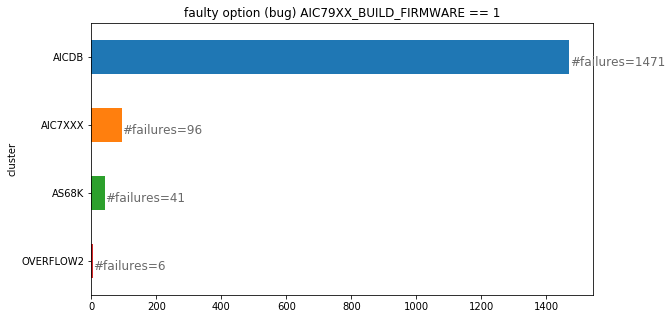

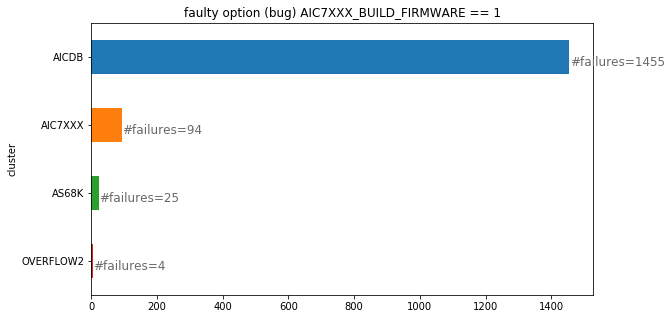

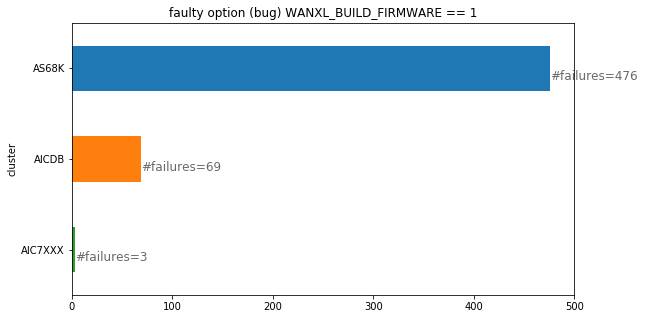

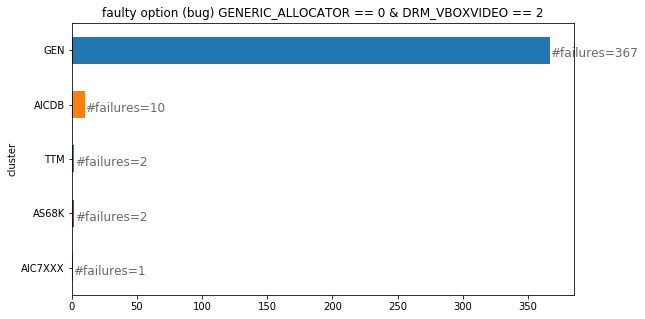

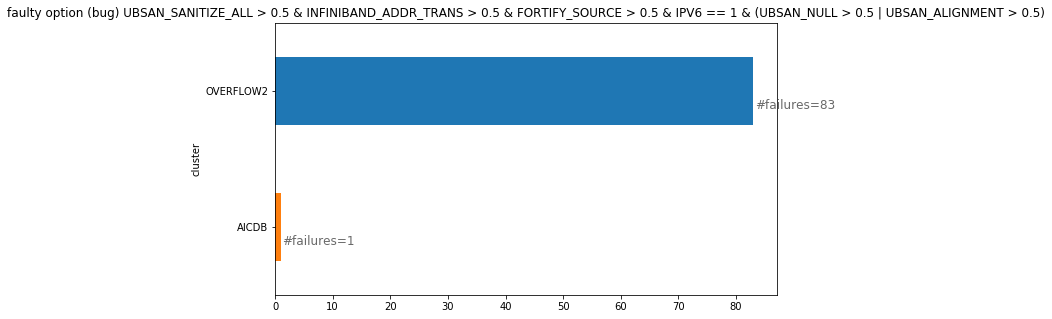

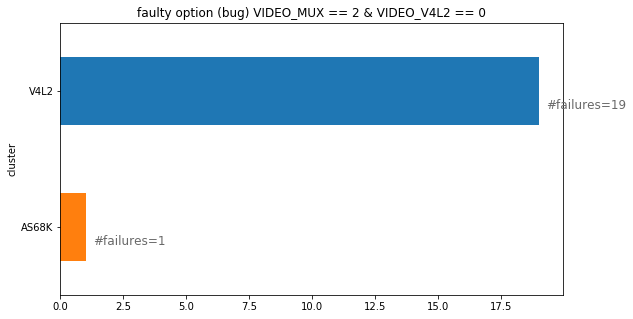

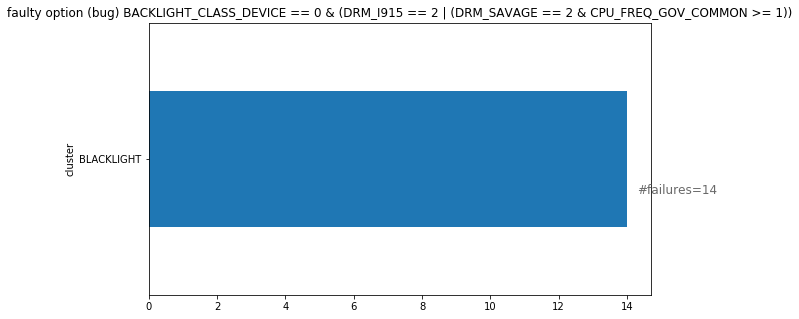

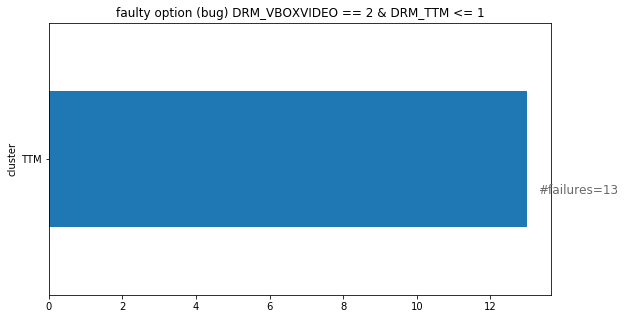

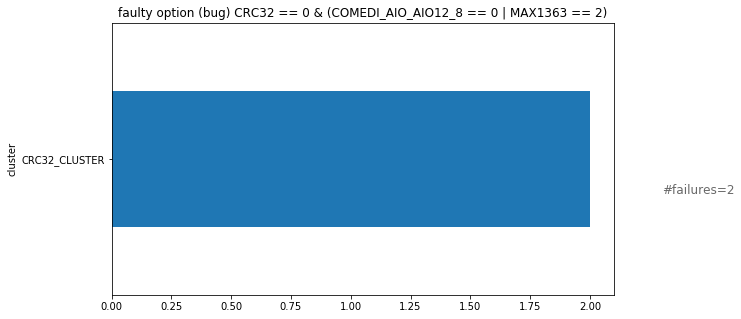

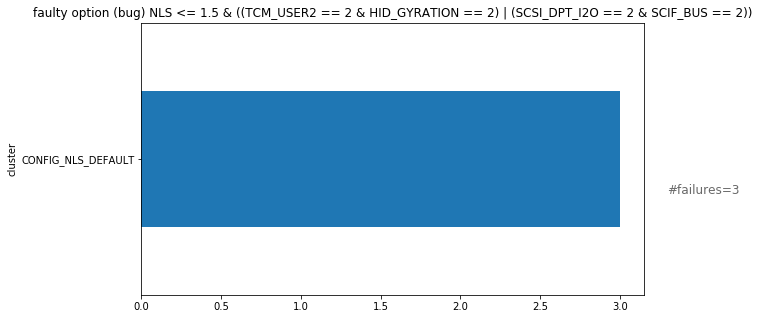

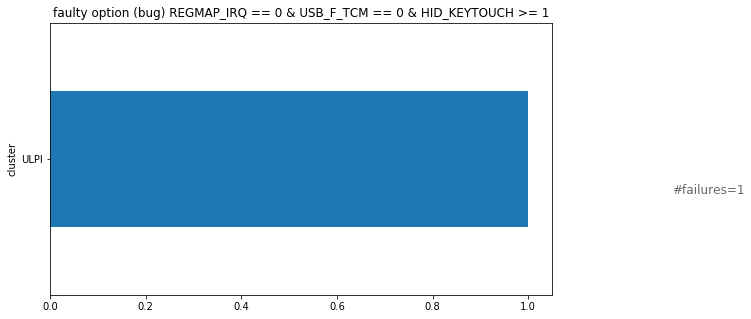

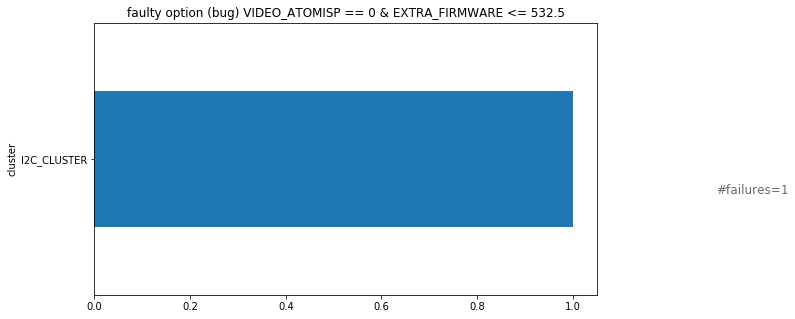

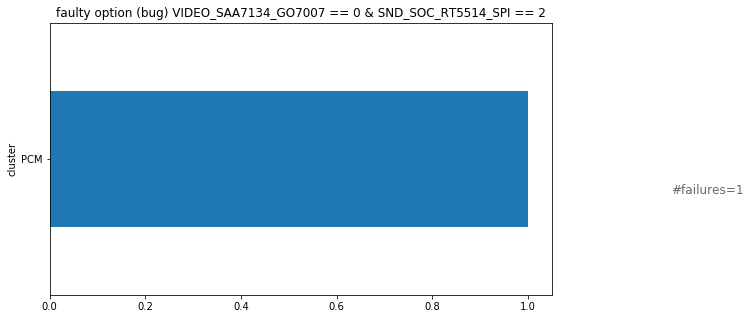

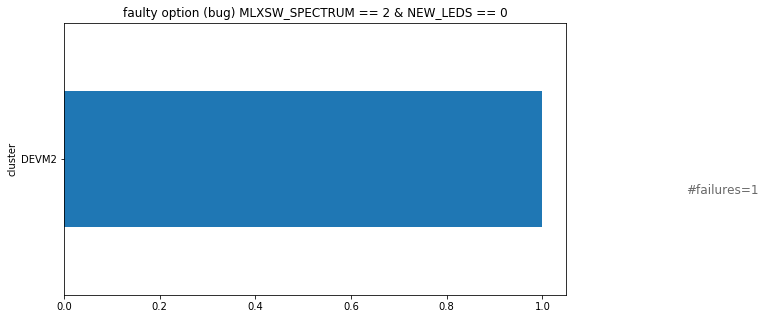

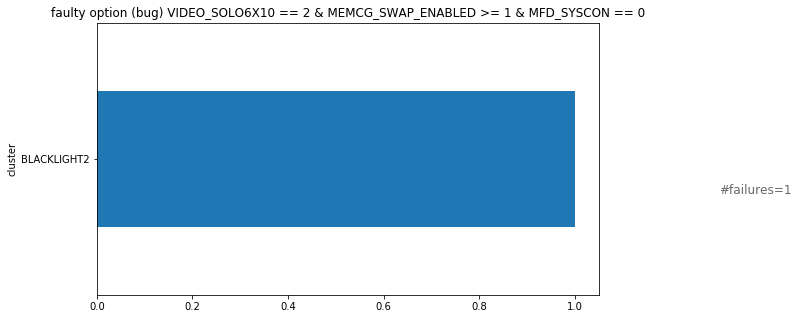

In [340]:
faulty_options = ["AIC79XX_BUILD_FIRMWARE == 1", # AICDB
                  "AIC7XXX_BUILD_FIRMWARE == 1", # AICDB
                  "WANXL_BUILD_FIRMWARE == 1", # AS68K 
                 "GENERIC_ALLOCATOR == 0 & DRM_VBOXVIDEO == 2", # GEN
                 "UBSAN_SANITIZE_ALL > 0.5 & INFINIBAND_ADDR_TRANS > 0.5 & FORTIFY_SOURCE > 0.5 & IPV6 == 1 & (UBSAN_NULL > 0.5 | UBSAN_ALIGNMENT > 0.5)",  # OVERFLOW2       
                 "VIDEO_MUX == 2 & VIDEO_V4L2 == 0", # V4L2 # note REGMAP_I2C comes with VIDEO_V4L2!
                 "BACKLIGHT_CLASS_DEVICE == 0 & (DRM_I915 == 2 | (DRM_SAVAGE == 2 & CPU_FREQ_GOV_COMMON >= 1))", # BLACKLIGHT # missing one?
                 "DRM_VBOXVIDEO == 2 & DRM_TTM <= 1", # TTM # it's another bug... note that DRM_TTM is not necessarily with GENERIC_ALLOCATOR in our datatset: the DT is statistically right and the causality is good!
                 "CRC32 == 0 & (COMEDI_AIO_AIO12_8 == 0 | MAX1363 == 2)", # CRC32 # not sufficient to capture the two failures (but CRC32 is clearly here!)
                 "NLS <= 1.5 & ((TCM_USER2 == 2 & HID_GYRATION == 2) | (SCSI_DPT_I2O == 2 & SCIF_BUS == 2))", # CONFIG_NS_DEFAULT (other failures)
                 "REGMAP_IRQ == 0 & USB_F_TCM == 0 & HID_KEYTOUCH >= 1", # ULPI
                  "VIDEO_ATOMISP == 0 & EXTRA_FIRMWARE <= 532.5", # I2C_CLUSTER
                  "VIDEO_SAA7134_GO7007 == 0 & SND_SOC_RT5514_SPI == 2", # PCM
                  "MLXSW_SPECTRUM == 2 & NEW_LEDS == 0", # DEVM (see also LEDS_CLASS)
                  "VIDEO_SOLO6X10 == 2 & MEMCG_SWAP_ENABLED >= 1 & MFD_SYSCON == 0" # BLACKLIGHT 2
                  
                 ]
for faulty_option in faulty_options:
    cl_frequencies_per_faultyopt = rawtuxdata.query(faulty_option)['cluster_errorfirst'].value_counts()
    df_frequencies = pd.DataFrame(cl_frequencies_per_faultyopt)
    df_frequencies['cluster'] = le_cluster.inverse_transform(cl_frequencies_per_faultyopt.index)
    #df_frequencies.plot.bar(stacked=True)
    ax = df_frequencies.plot.barh(y='cluster_errorfirst', x='cluster', legend=False, figsize=(9, 5)) #pie()
    ax.set_alpha(0.8)
    for i in ax.patches:
        ax.text(i.get_width()+.3, i.get_y()+.38, \
                "#failures=" + str(round(i.get_width(), 2)), fontsize=12,
                    color='dimgrey')
    
    ax.invert_yaxis()
    #ax.set_yticklabels(ax.get_ylabel(), fontsize=14)
    plt.title("faulty option (bug) " + faulty_option)    
    plt.savefig(faulty_option.replace(" ", "").replace("=", "").replace("<", "").replace(">", "").replace(".", "").replace("&", "").replace("(", "").replace(")", "") + "-faulty.pdf")
    plt.show()
    # print(df_frequencies)
#le_cluster.inverse_transform

In [76]:
ftuniques = []
for col in rawtuxdata.query("EXTRA_FIRMWARE <= 532.5"):
    ft = rawtuxdata[col]    
    if len(ft.unique()) == 1:
        ftuniques.append(col)
        
len(ftuniques)

3373

In [77]:
rawtuxdata.query("DRM_VBOXVIDEO == 2 & DRM_TTM <= 1")[['GENERIC_ALLOCATOR', compilation_status_column_name]]

,GENERIC_ALLOCATOR,compile_success
15492,1,0
25764,1,0
29548,1,0
30522,0,0
36309,1,0
37220,1,0
38178,1,0
40211,1,0
48165,0,0
63904,1,0


In [78]:
rawtuxdata.query("VIDEO_MUX == 2 & REGMAP_I2C == 0")[['VIDEO_V4L2', compilation_status_column_name]]

,VIDEO_V4L2,compile_success
1266,0,0
2198,0,0
15973,0,0
28966,0,0
33740,0,0
39907,0,0
41887,0,0
44136,0,0
61227,0,0
66694,0,0


In [79]:
#for i, cf in rawtuxdata.iterrows():
    #cf.query(compilation_status_column_name + " == 0")
    # cf[faulty_options[0]]
#   print(cf)
#    break

In [341]:
'''
how bugs interact? 
It's a weird implementation (ie code is redundant) but I found difficult to generalize (TODO of course)
'''
columns_bugs_interaction = ['degree_interaction', 'faulty_options', 'nb_failures', 'clusters']
bugs_interaction = pd.DataFrame(columns=columns_bugs_interaction)
for faulty_option in faulty_options:
    n_interactions1 = len(rawtuxdata.query(faulty_option).index)
    if (n_interactions1 > 0):
        print("bug interaction (1-wise)", n_interactions1, faulty_option)
        cluster_error1 = rawtuxdata.query(faulty_option)['cluster_errorfirst'].value_counts()
        cl_error1 = list(zip(le_cluster.inverse_transform(cluster_error1.index), cluster_error1.values))       
        # val1 = (1, faulty_option, n_interactions1, cl_error1)
        val1 = (1, sorted(set([faulty_option])), n_interactions1, cl_error1)
        bugs_interaction = bugs_interaction.append(pd.DataFrame([val1], columns=columns_bugs_interaction), ignore_index=True)
        for faulty_option2 in faulty_options:
            if (faulty_option != faulty_option2):
                n_interactions2 = len(rawtuxdata.query(faulty_option + " & " + faulty_option2).index)
                if (n_interactions2 > 0):
                    print("bug interaction (2-wise)", n_interactions2, faulty_option, faulty_option2)
                    cluster_error2 = rawtuxdata.query(faulty_option + " & " + faulty_option2)['cluster_errorfirst'].value_counts()
                    cl_error2 = list(zip(le_cluster.inverse_transform(cluster_error2.index), cluster_error2.values))
                    # val2 = (2, faulty_option + " WITH " + faulty_option2, n_interactions2, cl_error2)
                    val2 = (2, sorted(set([faulty_option, faulty_option2])), n_interactions2, cl_error2)
                    
                    bugs_interaction = bugs_interaction.append(pd.DataFrame([val2], columns=columns_bugs_interaction), ignore_index=True)
                    for faulty_option3 in faulty_options:
                        if (faulty_option3 != faulty_option and faulty_option3 != faulty_option2):
                            n_interactions3 = len(rawtuxdata.query(faulty_option + " & " + faulty_option2 + " & " + faulty_option3).index)
                            if (n_interactions3 > 0):
                                print("bug interaction (3-wise)", n_interactions3, faulty_option, faulty_option2, faulty_option3)
                                cluster_error3 = rawtuxdata.query(faulty_option + " & " + faulty_option2 + " & " + faulty_option3)['cluster_errorfirst'].value_counts()
                                cl_error3 = list(zip(le_cluster.inverse_transform(cluster_error3.index), cluster_error3.values))
                                # val3 = (3, faulty_option + " WITH " + faulty_option2 + " WITH " + faulty_option3, n_interactions3, cl_error3)
                                val3 = (3, sorted(set([faulty_option, faulty_option2, faulty_option3])), n_interactions3, cl_error3)
                               
                                bugs_interaction = bugs_interaction.append(pd.DataFrame([val3], columns=columns_bugs_interaction), ignore_index=True)                  
                                for faulty_option4 in faulty_options:
                                    if (faulty_option4 != faulty_option and faulty_option4 != faulty_option2 and faulty_option4 != faulty_option3):
                                        n_interactions4 = len(rawtuxdata.query(faulty_option + " & " + faulty_option2 + " & " + faulty_option3 + " & " + faulty_option4).index)
                                        ### FIXME we never found 4-interactions so I did not implement the add to bugs_interaction
                                        if (n_interactions4 > 0):
                                            print("bug interaction (4-wise)", n_interactions4, faulty_option, faulty_option2, faulty_option3, faulty_option4)
                                           




bug interaction (1-wise) 1614 AIC79XX_BUILD_FIRMWARE == 1
bug interaction (2-wise) 505 AIC79XX_BUILD_FIRMWARE == 1 AIC7XXX_BUILD_FIRMWARE == 1
bug interaction (3-wise) 21 AIC79XX_BUILD_FIRMWARE == 1 AIC7XXX_BUILD_FIRMWARE == 1 WANXL_BUILD_FIRMWARE == 1
bug interaction (3-wise) 2 AIC79XX_BUILD_FIRMWARE == 1 AIC7XXX_BUILD_FIRMWARE == 1 GENERIC_ALLOCATOR == 0 & DRM_VBOXVIDEO == 2
bug interaction (3-wise) 4 AIC79XX_BUILD_FIRMWARE == 1 AIC7XXX_BUILD_FIRMWARE == 1 UBSAN_SANITIZE_ALL > 0.5 & INFINIBAND_ADDR_TRANS > 0.5 & FORTIFY_SOURCE > 0.5 & IPV6 == 1 & (UBSAN_NULL > 0.5 | UBSAN_ALIGNMENT > 0.5)
bug interaction (2-wise) 85 AIC79XX_BUILD_FIRMWARE == 1 WANXL_BUILD_FIRMWARE == 1
bug interaction (3-wise) 21 AIC79XX_BUILD_FIRMWARE == 1 WANXL_BUILD_FIRMWARE == 1 AIC7XXX_BUILD_FIRMWARE == 1
bug interaction (2-wise) 5 AIC79XX_BUILD_FIRMWARE == 1 GENERIC_ALLOCATOR == 0 & DRM_VBOXVIDEO == 2
bug interaction (3-wise) 2 AIC79XX_BUILD_FIRMWARE == 1 GENERIC_ALLOCATOR == 0 & DRM_VBOXVIDEO == 2 AIC7XXX_BUIL

In [342]:
bugs_interaction.shape

(53, 4)

In [343]:
# bugs_interaction.drop_duplicates()
# weird (sorted set as string) to make it comparable and thus duplicable
ltx_bugs_interaction = bugs_interaction.iloc[bugs_interaction.astype(str).drop_duplicates().index]
ltx_bugs_interaction.loc[:,'faulty_options'] = ltx_bugs_interaction['faulty_options'].apply(lambda x: [e.replace(">0.5", "").replace("==", "").replace("1", "").replace("2", "").replace("0", "").replace(" ", "").replace("<=", "").replace("_BUILD_FIRMWARE", "") for e in x]) 
ltx = ltx_bugs_interaction.sort_values(by="degree_interaction", ascending=False).rename(columns={'degree_interaction': 'degree'})[:13].to_latex(index=False) # , longtable=True)
with open('bugsinteraction.tex', 'w') as f:
    f.write(ltx)
    
# ltx_bugs_interaction['faulty_options'] = 



In [126]:
pd.DataFrame([(1, "", 18)],
             columns=['faulty_options', 'nb_failures', 'degree_interaction'])
    
#    1, "", 18)])

,faulty_options,nb_failures,degree_interaction
0,1,,18


for cluster BLACKLIGHT


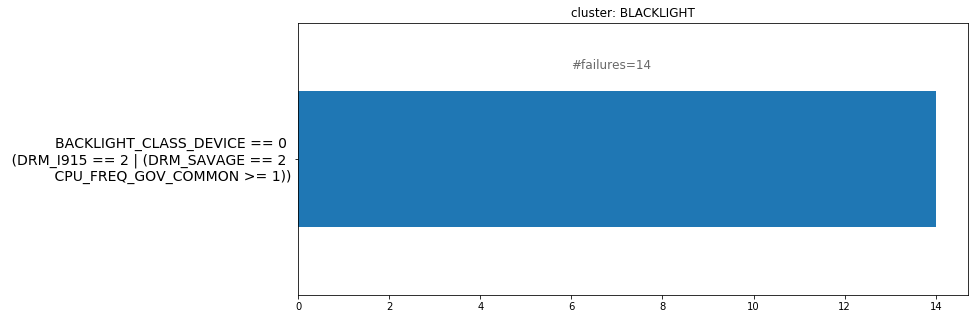


for cluster BLACKLIGHT2


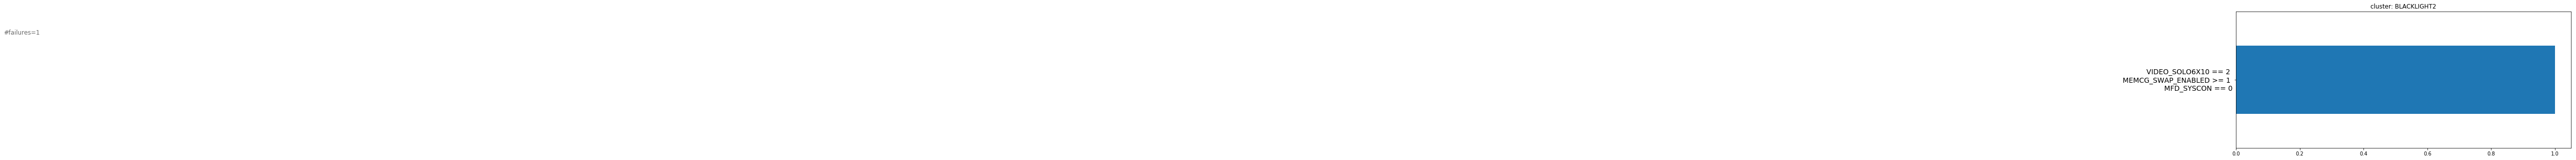


for cluster CONFIG_NLS_DEFAULT


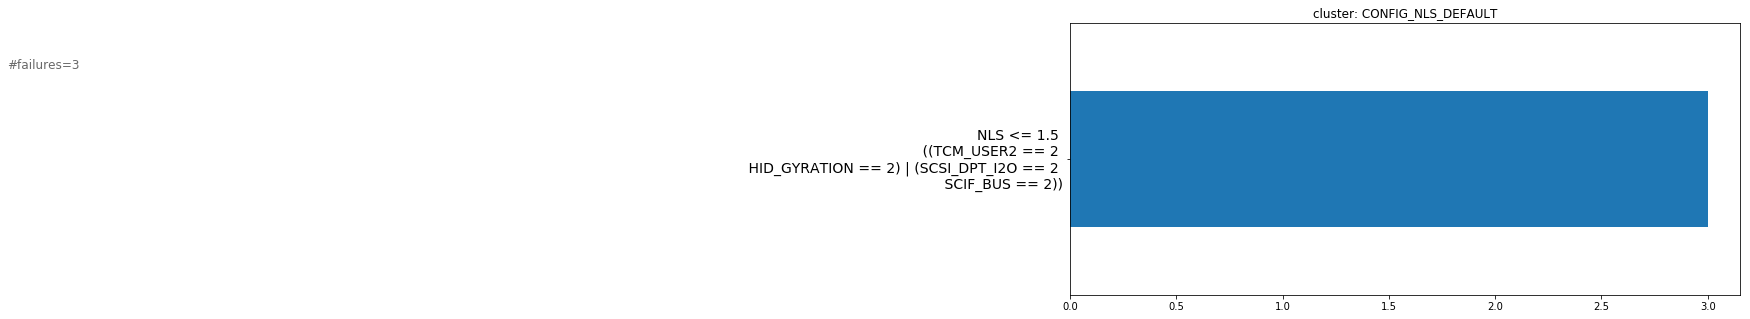


for cluster CRC32_CLUSTER


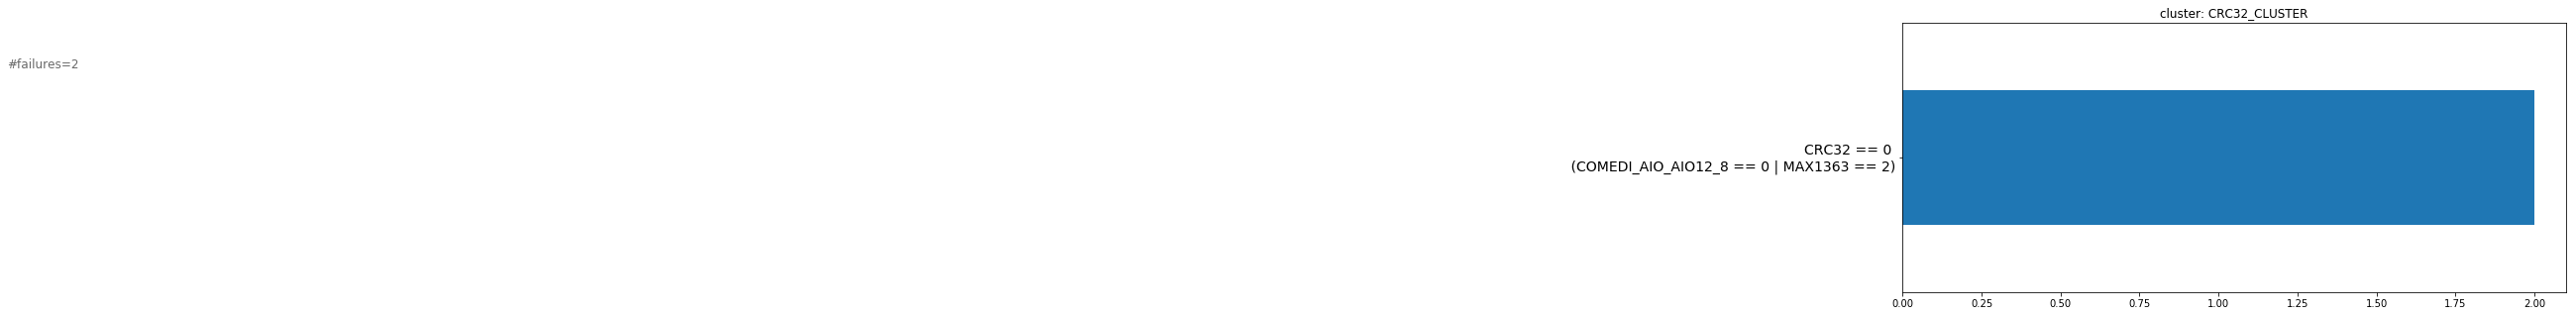


for cluster V4L2


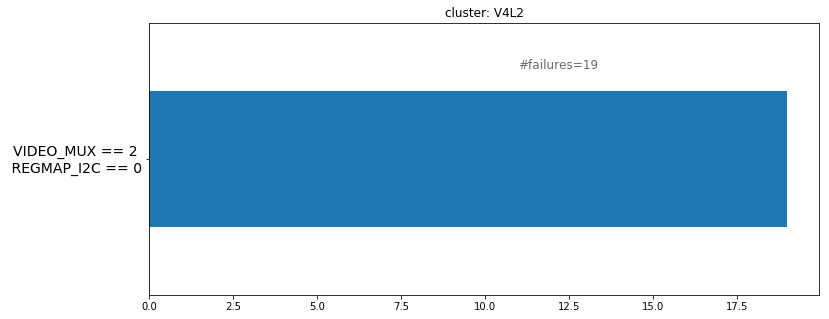


for cluster OVERFLOW2


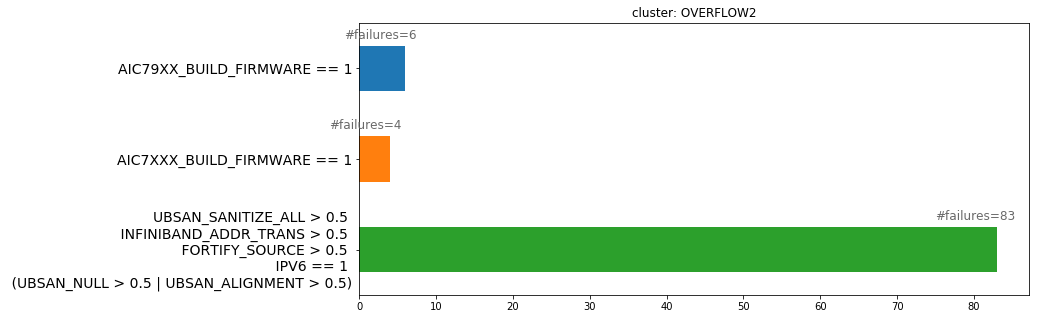


for cluster ULPI


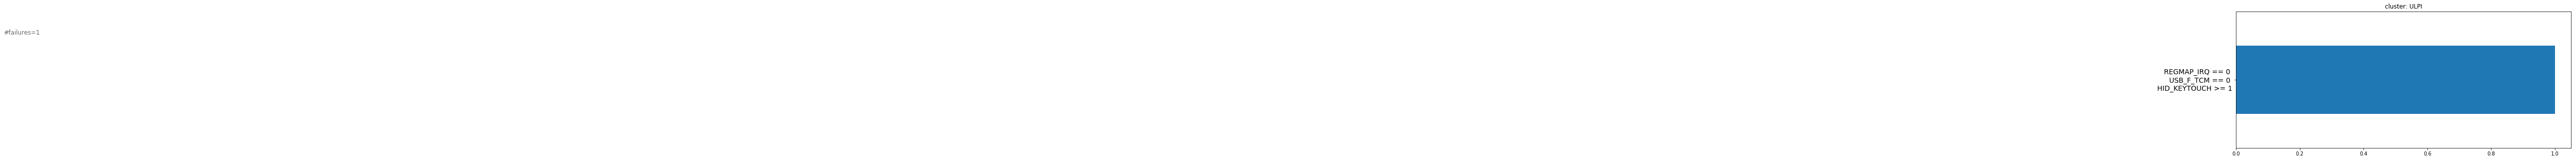


for cluster PCM


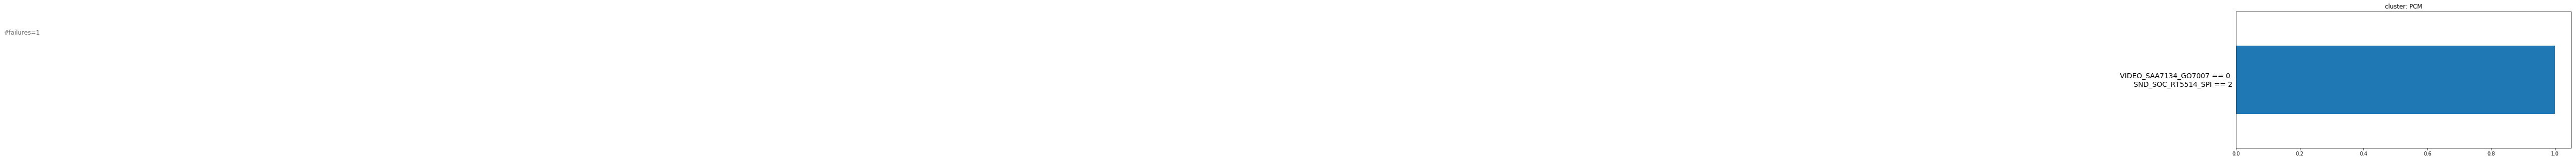


for cluster TTM


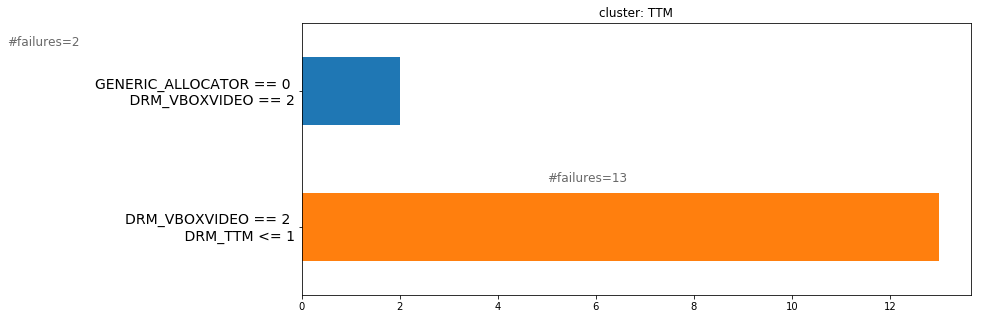


for cluster AS68K


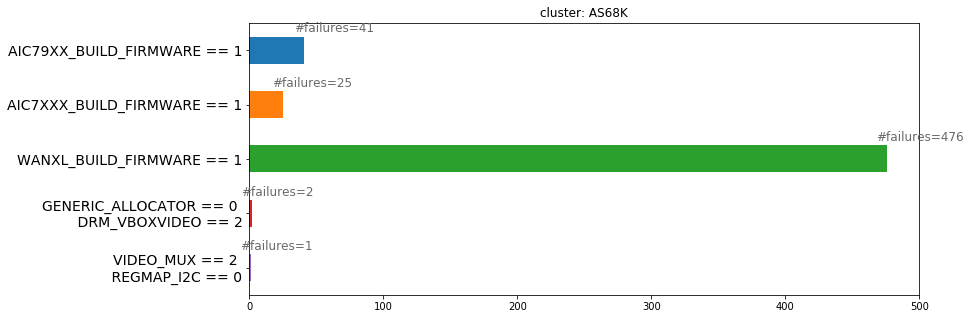


for cluster GEN


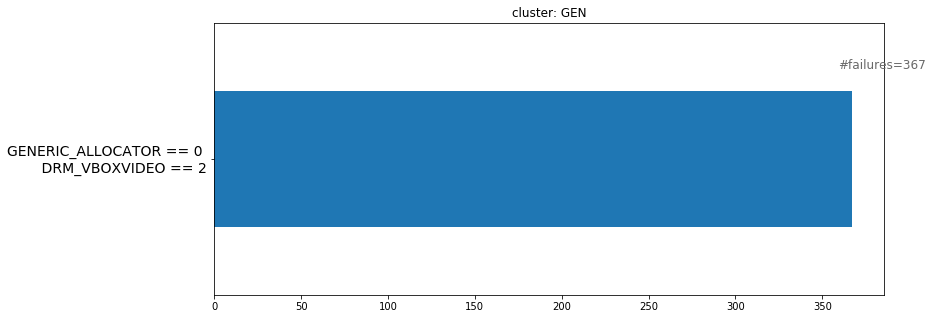


for cluster AICDB


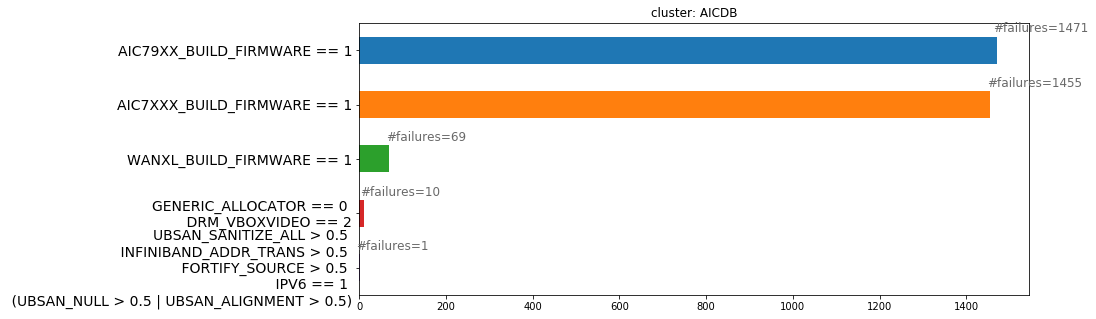


for cluster AIC7XXX


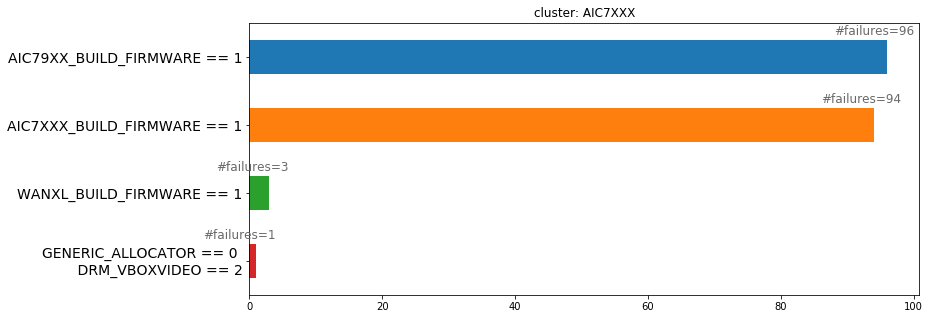


for cluster DRM_BRIDGE_CLUSTER


TypeError: Empty 'DataFrame': no numeric data to plot

In [294]:
#from matplotlib import rcParams
#rcParams.update({'figure.autolayout': False})

for errcl in ErrorLog:
    cl_name = errcl.name
    cfs = rawtuxdata.query(cl_name + " == True")
    print("for cluster", cl_name)
    faulty_opts_freq = pd.DataFrame(columns=["faulty_option", "freq"])
    nf = 0
    for faulty_option in faulty_options:
        flt = cfs.query(faulty_option)
        nflt = len(flt.index)
        if nflt > 0:
            #print("faulty option:", faulty_option, nflt)
            faulty_opts_freq.loc[nf] = (faulty_option, nflt)
            nf = nf + 1
    # print(faulty_opts_freq)
    ax = faulty_opts_freq.plot.barh(y='freq', x='faulty_option', legend=False, figsize=(12, 5))
    ftlabels = faulty_opts_freq['faulty_option'].values
    ftlabels_nice = [v.replace("&", "\n") for v in faulty_opts_freq['faulty_option'].values]
    # print(ftlabels_nice)
    ax.set_yticklabels(ftlabels_nice, fontsize=14)
    ax.set_ylabel("")
    for i in ax.patches:
        ax.text(i.get_width()-8, i.get_y()-.08, \
                "#failures=" + str(round(i.get_width(), 2)), fontsize=12,
                    color='dimgrey')
    
    ax.invert_yaxis()
    plt.title("cluster: " + cl_name)
#    plt.tight_layout()
    plt.savefig(cl_name + "-possiblebugs.pdf", bbox_inches = "tight")
    plt.show()
    print()

In [188]:
# len(errorlogs.index), 
# with pure random 
nfailures = len(errorlogs.query("cid >= 30000 & cid <= 90000").index)
nconfs = len(rawtuxdata.query("cid >= 30000 & cid <= 90000").index)
n_threefaulty = len(rawtuxdata.query("cid >= 30000 & cid <= 90000 & cluster_errorfirst == " + str(le_cluster.transform([ErrorLog.AIC7XXX.name])[0]) + "| cluster_errorfirst == " + str(le_cluster.transform([ErrorLog.AICDB.name])[0]) + " | cluster_errorfirst == " + str(le_cluster.transform([ErrorLog.AS68K.name])[0])).index)
nfailures, nconfs, (nfailures / nconfs) * 100, n_threefaulty, ((nfailures - n_threefaulty) / nconfs) * 100, (nfailures / nconfs) * 100 - ((nfailures - n_threefaulty) / nconfs) * 100

(3460, 59366, 5.8282518613347705, 3101, 0.6047232422598794, 5.223528619074891)

In [158]:
# after specialization 
nfailures_spe = len(errorlogs.query("cid >= 90000").index)
nconfs_spe = len(rawtuxdata.query("cid >= 90000").index)
nfailures_spe, nconfs_spe, (nfailures_spe / nconfs_spe) * 100

(161, 36729, 0.43834572136458927)

In [173]:
rawtuxdata['cluster_errorfirst'][:5]

0    13
1    13
2    13
3    13
4    13
Name: cluster_errorfirst, dtype: int64

In [172]:
le_cluster.transform([ErrorLog.AIC7XXX.name])[0]

0

In [186]:
len(errorlogs.index)

3621

In [331]:


clusters_and_faults = pd.read_csv('clusters-AM-withfault.csv')
#clusters_and_faults['failures'] = [(str(cluf['nb_failures']) + " (" + str(cluf['percentage']) + "%)") for i, cluf in clusters_and_faults.iterrows()]

#clusters_and_faults['failures'] = 
# 'nb_failures', 'percentage'
clusters_and_faults_fortex = clusters_and_faults.sort_values(by='nb_failures', ascending=False).drop(columns=['Unnamed: 0', 'Note', 'Github issue']).query("cluster != 'BPFFANCY'")#[['cluster', 'failures', 'error message', 'bug (faulty option)', 'Bug?', 'Fix', ]]

with open('clustersfaults.tex', 'w') as f:
    f.write(clusters_and_faults_fortex.to_latex(index=False))


len(clusters_and_faults_fortex.index)
    
    
    
    
    
    
    
    
    

19

In [259]:
'''
number of options with more than one value (always 'y' or always 'n' does not count)
'''
nunique = 0
for col in rawtuxdata:
    opt = rawtuxdata[col]    
    if len(opt.unique()) <= 1:
        nunique = nunique + 1
        
len(rawtuxdata.columns), nunique, len(rawtuxdata.columns) - nunique
        

(12659, 3373, 9286)

In [297]:
pd.DataFrame([len(error.splitlines()) for error in errorlogs['error_message']]).describe()

,0
count,3621.000000
mean,21734.601491
std,59995.739333
min,3.000000
25%,27.000000
50%,28.000000
75%,37.000000
max,300110.000000


In [329]:
warnings_occ = pd.DataFrame([(("warnings" in error) or ("Warning:" in error)) for error in errorlogs['error_message']])[0].value_counts()
(warnings_occ[0] / (warnings_occ[0] + warnings_occ[1])) * 100
#(3103 / (3103+518)) * 100

92.32256282794809